## Forest Cover Type Prediction

### Abstract




### Dataset 

1. Elevation = Elevation in meters.
2. Aspect = Aspect in degrees azimuth.
3. Slope = Slope in degrees.
4. Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
5. Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
6. Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
7. Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
8. Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
9. Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
10. Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points.
11. Wilderness_Area1 = Rawah Wilderness Area
12. Wilderness_Area2 = Neota Wilderness Area
13. Wilderness_Area3 = Comanche Peak Wilderness Area
14. Wilderness_Area4 = Cache la Poudre Wilderness Area
15. Soil_Type1 to Soil_Type40

#### Target variable Cover_Type has Integer values between 1 and 7, with the following keys:

Spruce/Fir
Lodgepole Pine
Ponderosa Pine
Cottonwood/Willow
Aspen
Douglas-fir
Krummholz

In [245]:
#Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_selection import RFECV, SelectFromModel, variance_threshold, SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# change the working directory
os.chdir('N:/Advance Data Science/Nikhil_Kohli_Assign1_ADS')

In [4]:
# Read the Forest Cover data from the csv using pandas

df_forest = pd.read_csv('forest_covertype.csv')
df_forest.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points    Soil_Type   Wilderness_Area  \
0                                6279  Soil_Type29  Wilderness_Area1   
1                                6225  Soil_Type29  Wilderness_Area1   
2                                6121  Soil_Type12  Wilderness_Area1   
3                                6211  Soil_Type30  Wilderness_Area1   
4                                6172  Soil_Type29  Wilderness_Area1   
5                                6031  Soil_Type29  Wilderness_Area1   
6                                6256  Soil_Type29  Wilderness_Area1   
7                                6228  Soil_Type29  Wilderness_Area1   
8                                6244  Soil_Type29  Wilderness_Area1   
9                                6230  Soil_Type29  Wilderness_Area1   

   Cover_Type  
0           5  
1           5  
2           2  
3           2  
4           5  
5           2  
6           5  
7           5  
8           5  
9           5

## Data Exploration/Analysis

In [5]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Soil_Type                             581012 non-null object
Wilderness_Area                       581012 non-null object
Cover_Type                            581012 non-null int64
dtypes: int64(11), object(2)
memory usage: 57.6+ MB


In [6]:
df_forest.columns.values

array(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area', 'Cover_Type'], dtype=object)

In [7]:
df_forest.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points     Cover_Type  
count  581012.000000                       581012.000000  581012.000000  
mean      142.528263                         1980.291226       2.051471  
std        38.274529                         1324.195210       1.396504  
min         0.000000                            0.000000       1.000000  
25%       119.000000                         1024.000000       1.000000  
50%       143.000000                         1710.000000       2.000000  
75%       168.000000                         2550.000000       2.000000  
max       254.000000                         7173.000000       7.000000

In [8]:
df_forest.shape

(581012, 13)

In [9]:
df_forest.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Soil_Type                             0
Wilderness_Area                       0
Cover_Type                            0
dtype: int64

In [10]:
df_forest = df_forest.rename(columns= {'Horizontal_Distance_To_Hydrology':'Horz_Dist_To_Hydro',
                                      'Vertical_Distance_To_Hydrology':'Vert_Dist_To_Hydro',
                                      'Horizontal_Distance_To_Roadways':'Horizontal_Distance_To_Roadways',
                                      'Horizontal_Distance_To_Fire_Points':'Horizontal_Distance_To_Fire_Points'})

## Outlier Detection

### Elevation 

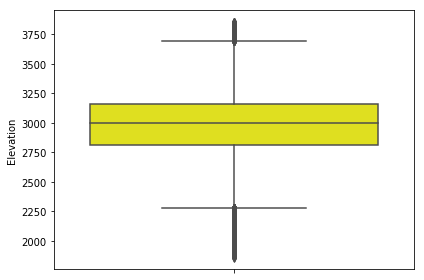

In [11]:
sns.boxplot(y=df_forest['Elevation'],color='Yellow')
plt.tight_layout()

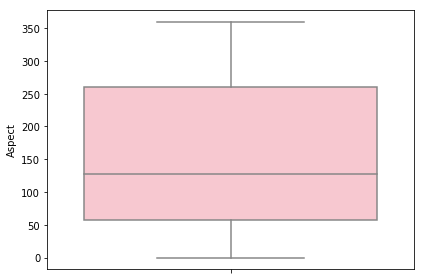

In [12]:
sns.boxplot(y=df_forest['Aspect'],color='Pink')
plt.tight_layout()

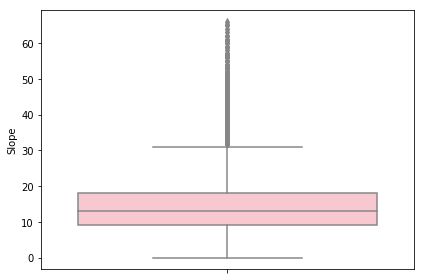

In [13]:
sns.boxplot(y=df_forest['Slope'],color='Pink')
plt.tight_layout()

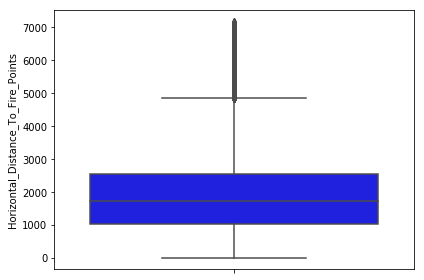

In [14]:
sns.boxplot(y=df_forest['Horizontal_Distance_To_Fire_Points'],color='Blue')
plt.tight_layout()

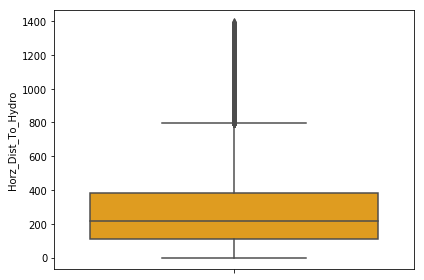

In [15]:
sns.boxplot(y=df_forest['Horz_Dist_To_Hydro'],color='orange')
plt.tight_layout()

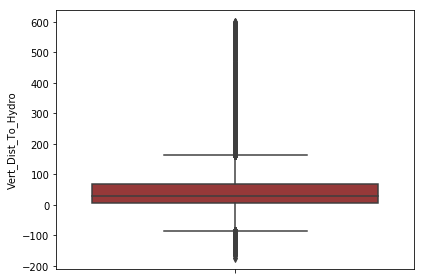

In [16]:
sns.boxplot(y=df_forest['Vert_Dist_To_Hydro'],color='brown')
plt.tight_layout()

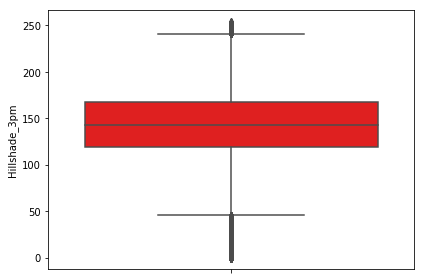

In [17]:
sns.boxplot(y=df_forest['Hillshade_3pm'],color='red')
plt.tight_layout()

## Remove Outliers 

In [18]:
df_forest_temp = df_forest
df_forest_temp = df_forest_temp.drop(columns=['Cover_Type'])
df_forest_temp.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       2596      51      3                 258                   0   
1       2590      56      2                 212                  -6   
2       2804     139      9                 268                  65   
3       2785     155     18                 242                 118   
4       2595      45      2                 153                  -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points    Soil_Type  \
0            148                                6279  Soil_Type29   
1            151                                6225  Soil_Type29   
2            135                                6121  Soil_Type12   
3            122                                6211  Soil_Type30   
4            150                                6172  Soil_Type29   

    Wilderness_Area  
0  Wilderness_Area1  
1  Wilderness_Area1  
2  Wilderness_Area1  
3  Wilderness_Area1  
4  Wilderness_Area1

In [19]:
Q1 = df_forest_temp.quantile(0.25)
Q3 = df_forest_temp.quantile(0.75)
IQR = Q3 - Q1
IQR

Elevation                              354.0
Aspect                                 202.0
Slope                                    9.0
Horz_Dist_To_Hydro                     276.0
Vert_Dist_To_Hydro                      62.0
Horizontal_Distance_To_Roadways       2222.0
Hillshade_9am                           33.0
Hillshade_Noon                          24.0
Hillshade_3pm                           49.0
Horizontal_Distance_To_Fire_Points    1526.0
dtype: float64

In [164]:
df_forest_clean = df_forest[~((df_forest_temp < (Q1 - 1.5 * IQR)) |(df_forest_temp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [165]:
print('Original Shape of the data : ', df_forest.shape)
print('Shape after Outlier Removal : ',df_forest_clean.shape)

Original Shape of the data :  (581012, 13)
Shape after Outlier Removal :  (472673, 13)


In [125]:
df_forest_clean.Cover_Type.unique()

array([2, 1, 5, 7, 3, 6, 4], dtype=int64)

In [28]:
## I will see the effects of Outlier Removal on the Predictions while Modeling

In [32]:
## Categorical features


In [126]:
df_forest_clean.describe(include=['object'])

Soil_Type   Wilderness_Area
count        472673            472673
unique           39                 4
top     Soil_Type29  Wilderness_Area1
freq          95355            215405

In [127]:
categorical_var = df_forest_clean.describe(include=['object']).columns
categorical_var

Index(['Soil_Type', 'Wilderness_Area'], dtype='object')

In [128]:
df_forest_clean.Soil_Type.unique()

array(['Soil_Type30', 'Soil_Type29', 'Soil_Type16', 'Soil_Type18',
       'Soil_Type12', 'Soil_Type24', 'Soil_Type23', 'Soil_Type20',
       'Soil_Type40', 'Soil_Type19', 'Soil_Type22', 'Soil_Type39',
       'Soil_Type9', 'Soil_Type38', 'Soil_Type33', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type11', 'Soil_Type10', 'Soil_Type4',
       'Soil_Type13', 'Soil_Type28', 'Soil_Type34', 'Soil_Type2',
       'Soil_Type6', 'Soil_Type1', 'Soil_Type3', 'Soil_Type5',
       'Soil_Type14', 'Soil_Type17', 'Soil_Type37', 'Soil_Type35',
       'Soil_Type21', 'Soil_Type26', 'Soil_Type36', 'Soil_Type27',
       'Soil_Type25', 'Soil_Type8', 'Soil_Type7'], dtype=object)

In [129]:
df_forest_clean.Wilderness_Area.unique()

array(['Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Wilderness_Area2'], dtype=object)

## EDA (Exploratory Data Analysis)

In [27]:
df_continous = df_forest_clean.loc[:,df_forest_clean.describe().columns]
df_continous.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
11       2886     151     11                 371                  26   
21       2880     209     17                 216                  30   
27       2962     148     16                 323                  23   
35       2900      45     19                 242                  20   
61       2952     107     11                  42                   7   

    Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
11                             5253            234             240   
21                             4986            206             253   
27                             5916            240             236   
35                             5199            221             195   
61                             5845            239             226   

    Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Cover_Type  
11            136                                4051           2  
21            179                                4323           2  
27            120                                3395           2  
35            100                                4115           2  
61            116                                3509           2

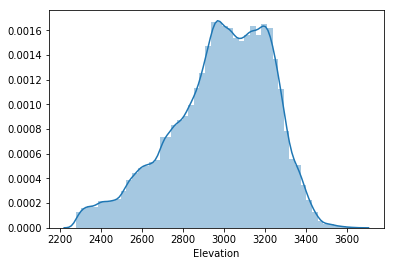

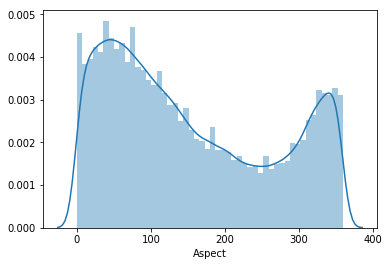

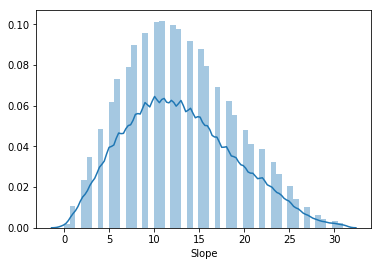

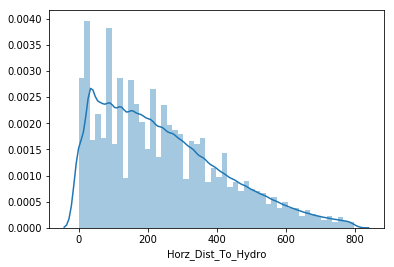

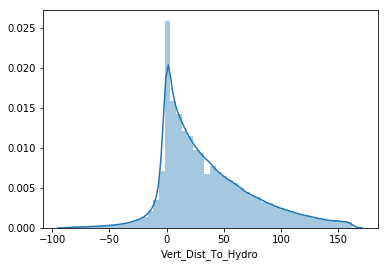

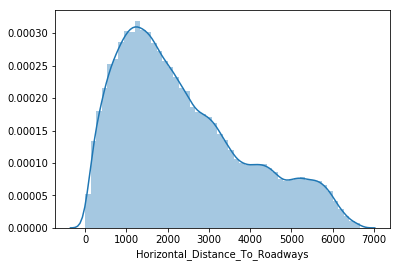

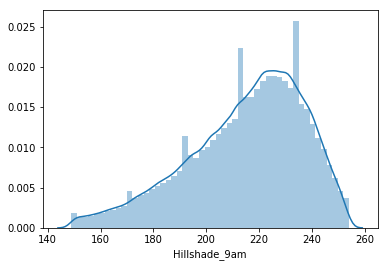

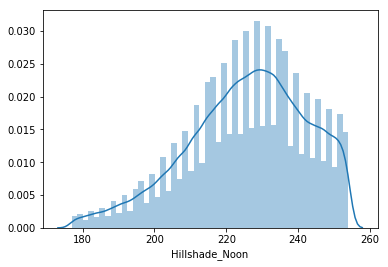

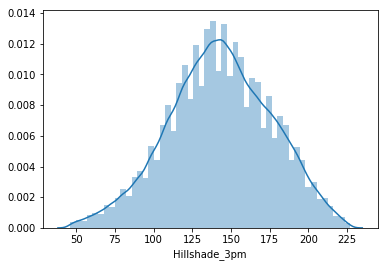

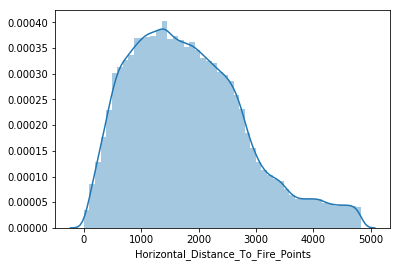

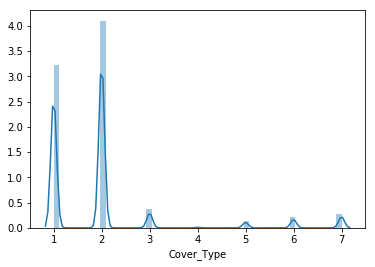

In [28]:
for index, column in enumerate(df_continous.columns):
    plt.figure(index)
    sns.distplot(df_continous[column])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F9A78BE48>,
      dtype=object)

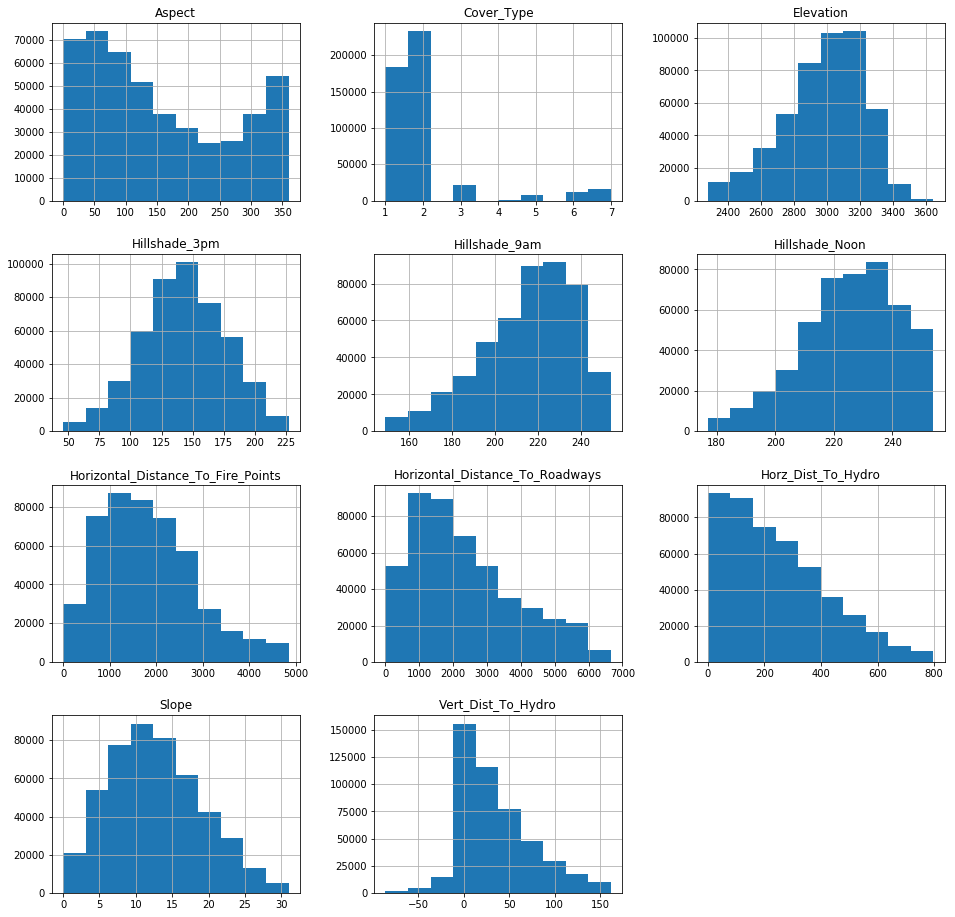

In [130]:
df_forest_clean.hist(column=df_continous.columns, figsize = (16,16))

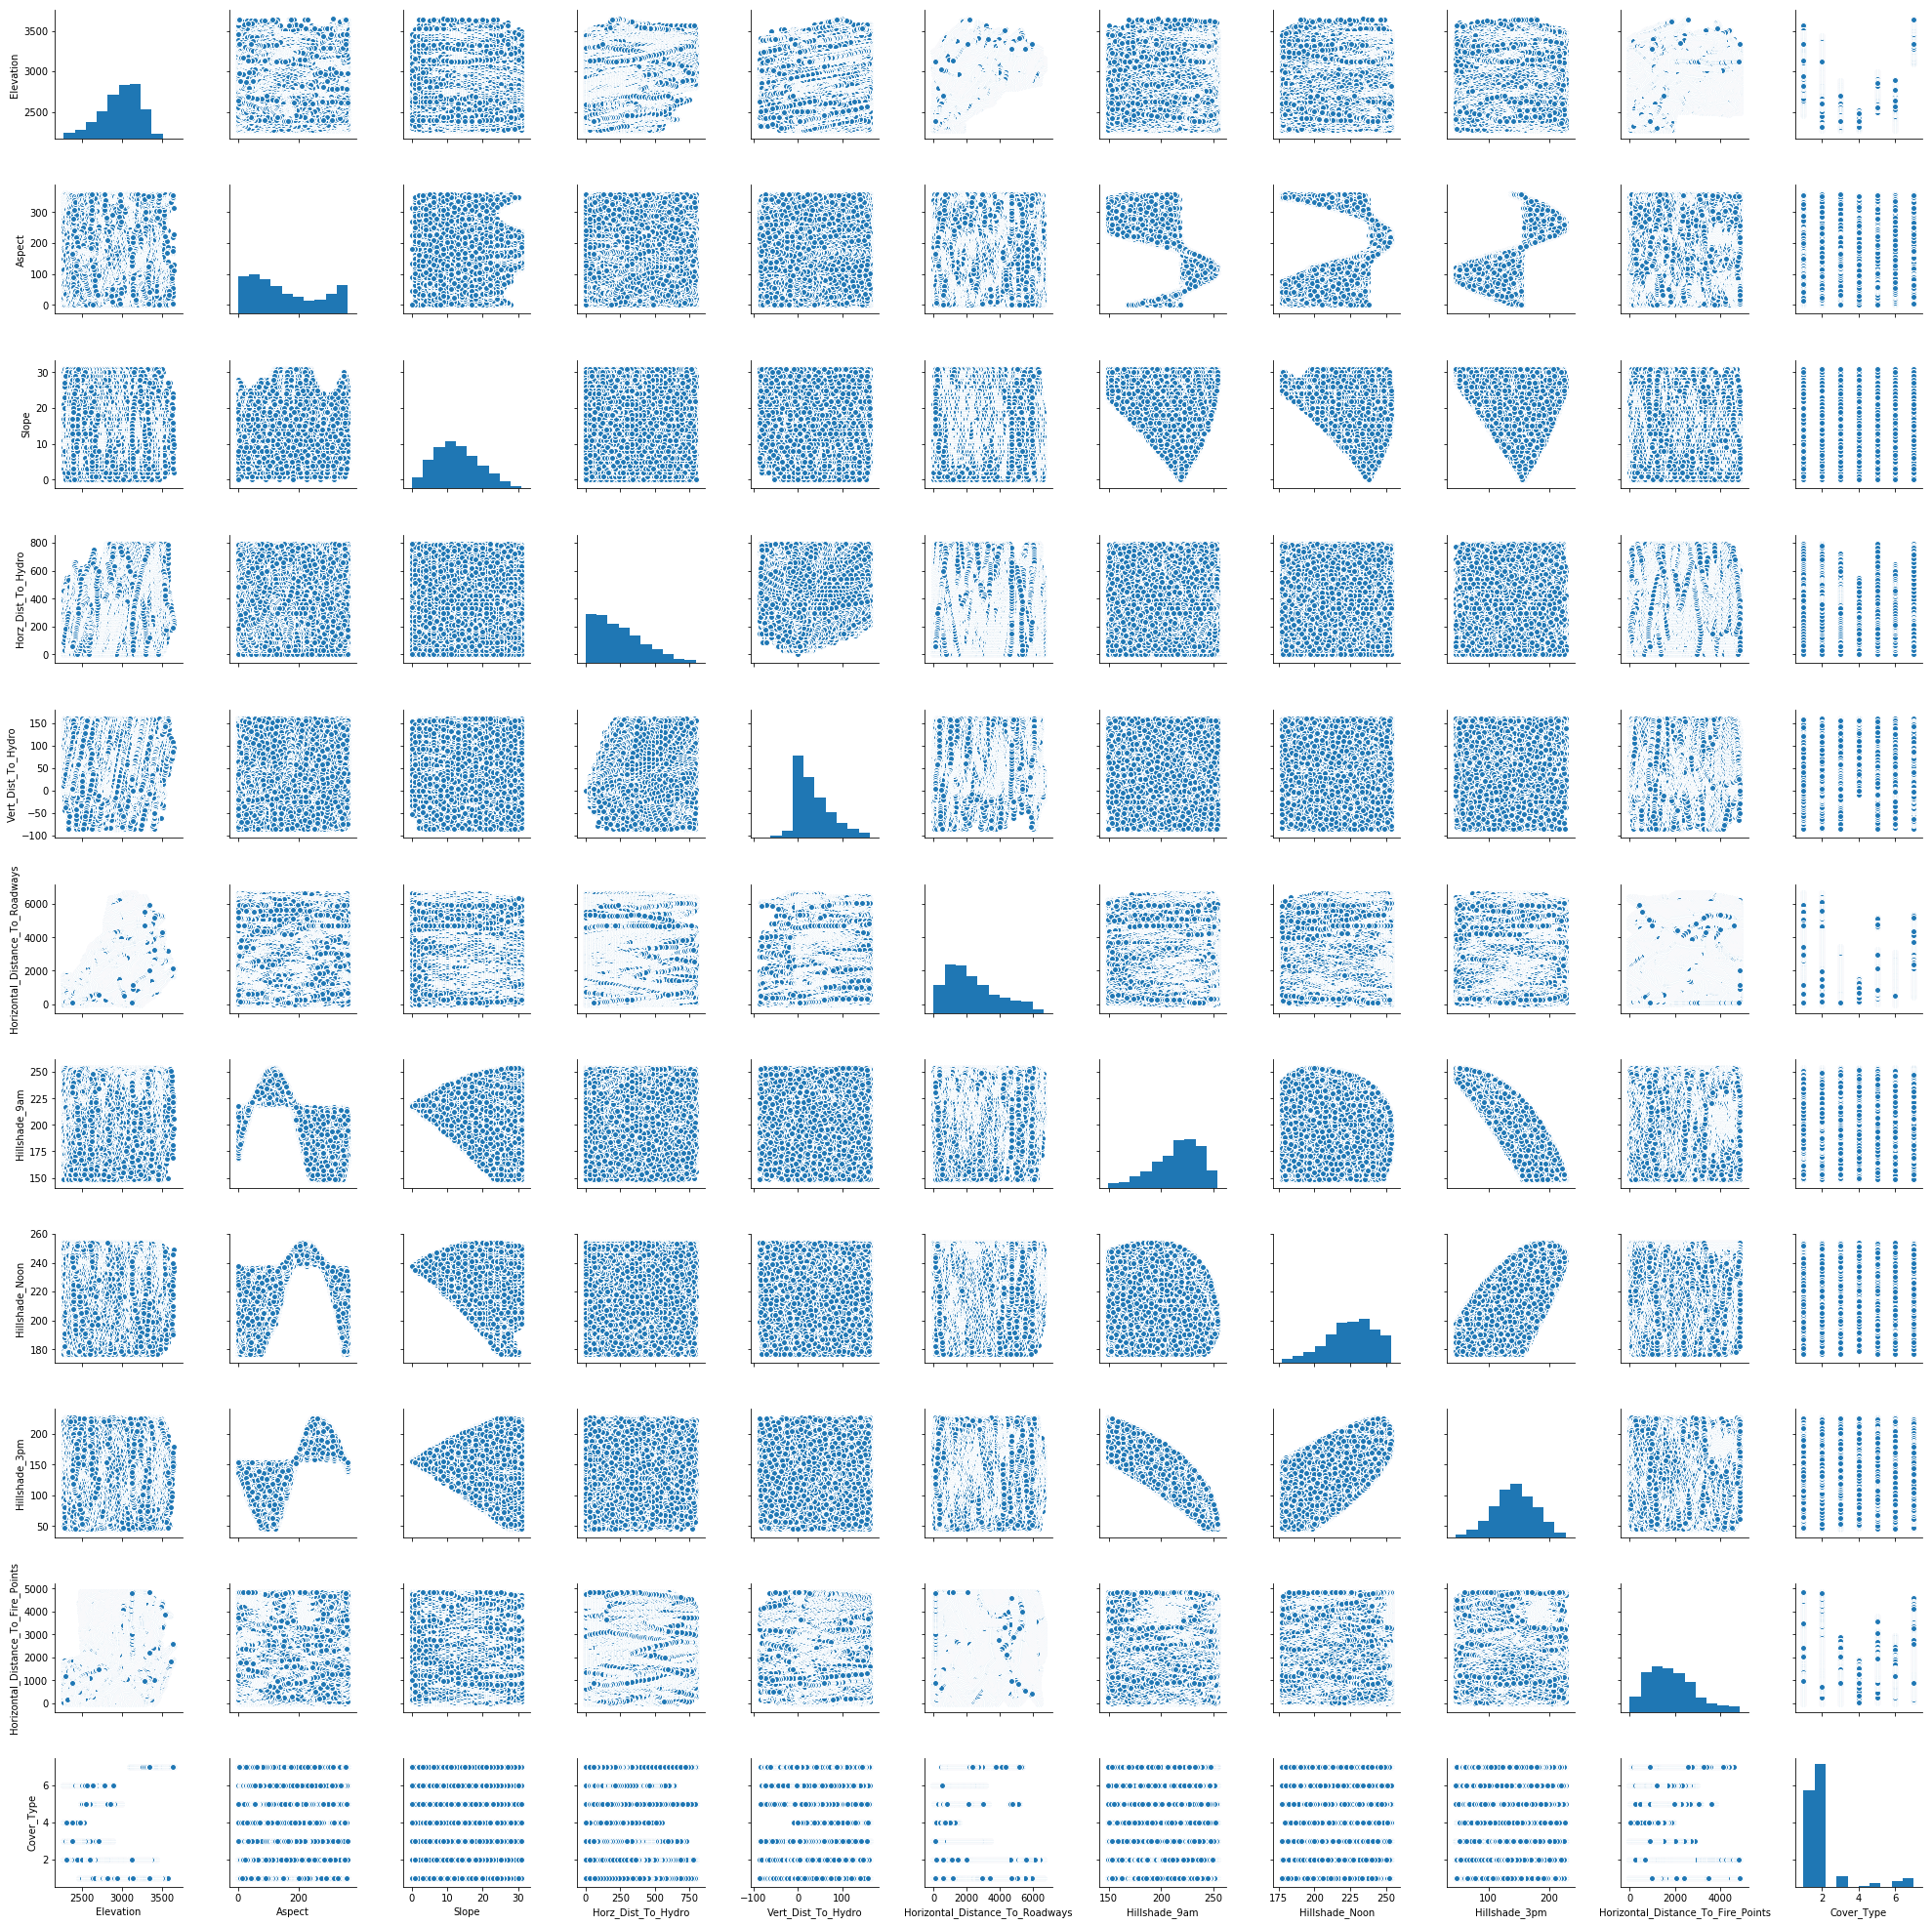

In [93]:
sns.pairplot(df_continous)

In [131]:
df_forest_clean.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness_Area',
       'Cover_Type'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

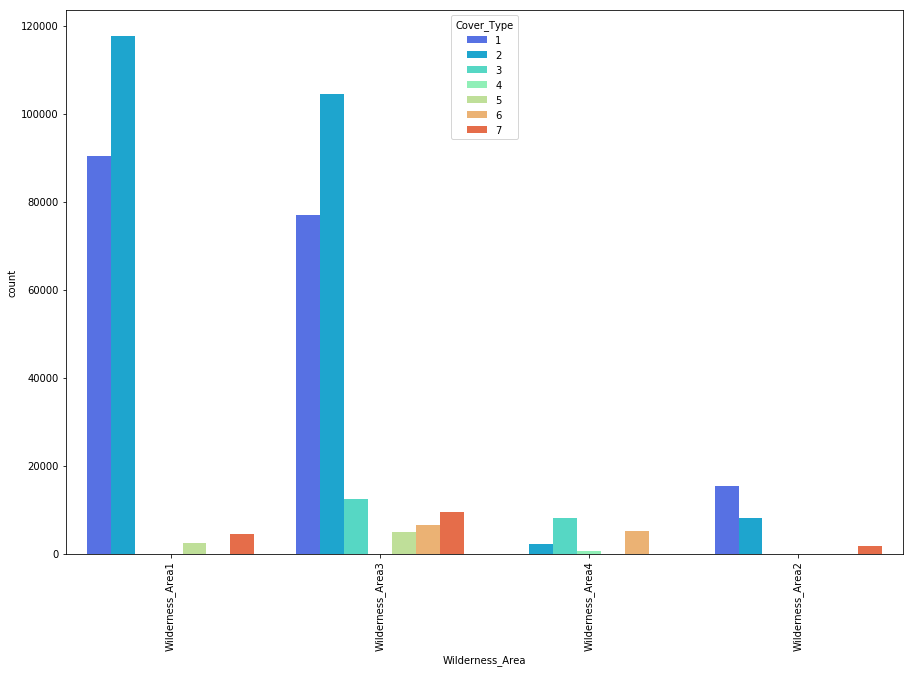

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(x='Wilderness_Area', hue='Cover_Type',data=df_forest_clean, palette="rainbow")
plt.xticks(rotation=90)

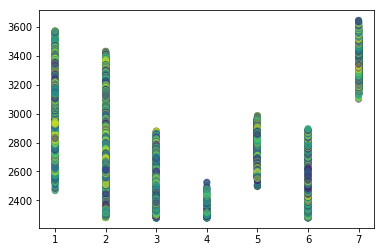

In [32]:
colors = np.random.rand(len(df_forest_clean))
N = len(df_forest_clean)
area = (30 * np.random.rand(N))**2

plt.scatter(df_forest_clean['Cover_Type'], df_forest_clean['Elevation'], c=colors, alpha=0.5)
plt.show()

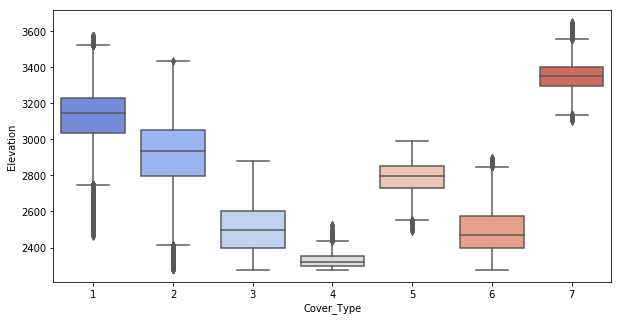

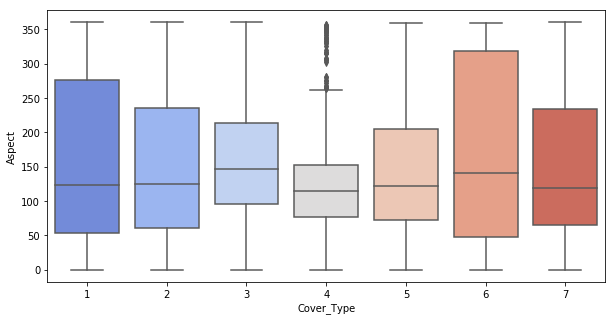

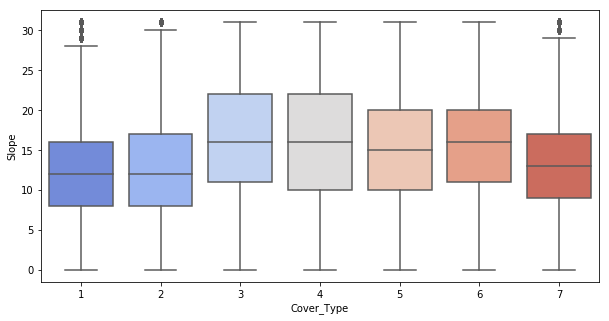

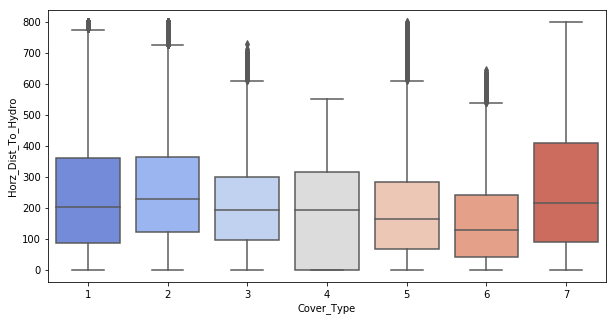

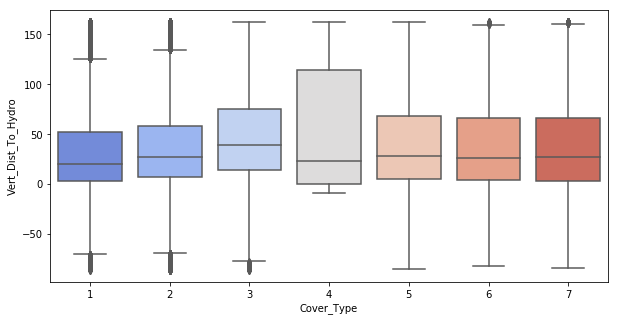

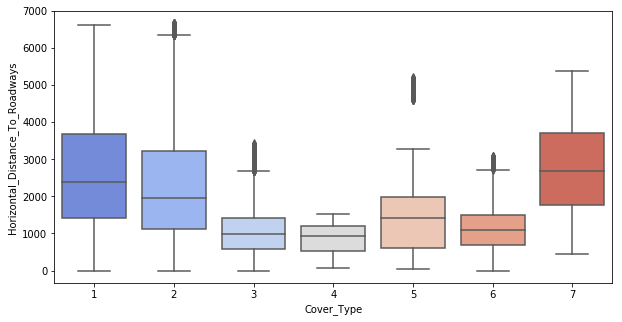

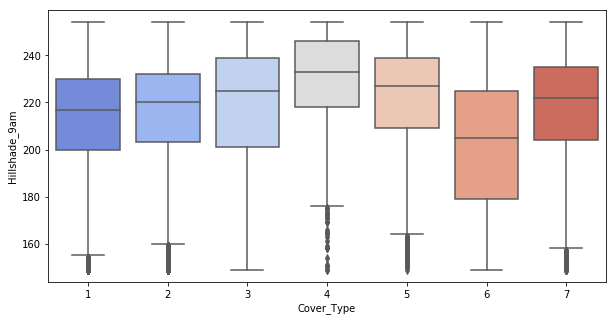

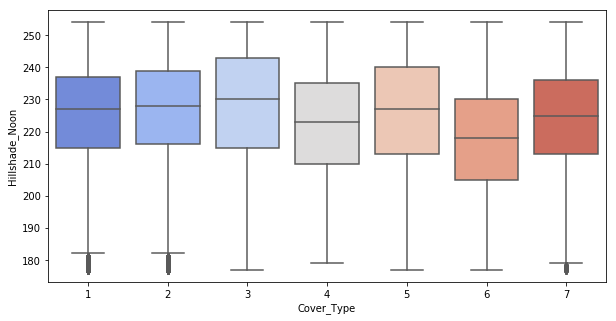

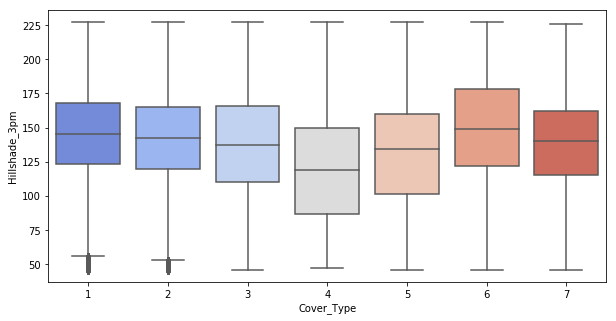

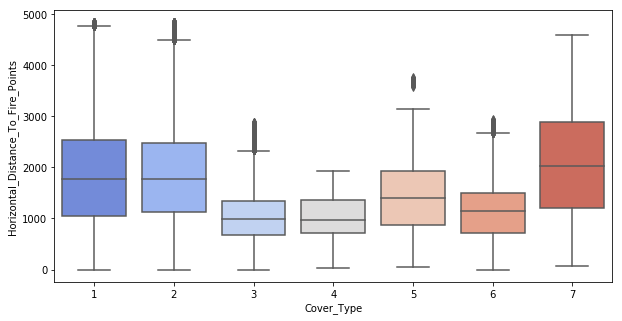

In [108]:
for ind, col in enumerate(df_continous.columns):
    plt.figure(ind,figsize=(10,5))
    sns.boxplot(x=df_forest_clean['Cover_Type'], y=col, data=df_forest_clean, palette="coolwarm")

## Feature Engineering & Feature selection

In [171]:
df_forest_bckup = df_forest_clean

In [172]:
Wilderness = pd.get_dummies(df_forest_clean["Wilderness_Area"], prefix_sep='_', drop_first=True)
Soil = pd.get_dummies(df_forest_clean["Soil_Type"], prefix_sep='_', drop_first=True)

df_forest_final=pd.concat([df_forest_clean,Wilderness], axis=1)
df_forest_final= pd.concat([df_forest_final, Soil], axis=1)
df_forest_final.head()


Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
11       2886     151     11                 371                  26   
21       2880     209     17                 216                  30   
27       2962     148     16                 323                  23   
35       2900      45     19                 242                  20   
61       2952     107     11                  42                   7   

    Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
11                             5253            234             240   
21                             4986            206             253   
27                             5916            240             236   
35                             5199            221             195   
61                             5845            239             226   

    Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ... Soil_Type37  \
11            136                                4051  ...           0   
21            179                                4323  ...           0   
27            120                                3395  ...           0   
35            100                                4115  ...           0   
61            116                                3509  ...           0   

   Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  Soil_Type6  \
11           0            0           0            0           0           0   
21           0            0           0            0           0           0   
27           0            0           0            0           0           0   
35           0            0           0            0           0           0   
61           0            0           0            0           0           0   

    Soil_Type7  Soil_Type8  Soil_Type9  
11           0           0           0  
21           0           0           0  
27           0           0           0  
35           0           0           0  
61           0           0           0  

[5 rows x 54 columns]

In [ ]:
df_forest_final.reindex

In [173]:
df_forest_final = df_forest_final.drop(columns=['Wilderness_Area','Soil_Type'])
df_forest_final.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
11       2886     151     11                 371                  26   
21       2880     209     17                 216                  30   
27       2962     148     16                 323                  23   
35       2900      45     19                 242                  20   
61       2952     107     11                  42                   7   

    Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
11                             5253            234             240   
21                             4986            206             253   
27                             5916            240             236   
35                             5199            221             195   
61                             5845            239             226   

    Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
11            136                                4051  ...            0   
21            179                                4323  ...            0   
27            120                                3395  ...            0   
35            100                                4115  ...            0   
61            116                                3509  ...            0   

    Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  Soil_Type6  \
11            0            0           0            0           0           0   
21            0            0           0            0           0           0   
27            0            0           0            0           0           0   
35            0            0           0            0           0           0   
61            0            0           0            0           0           0   

    Soil_Type7  Soil_Type8  Soil_Type9  
11           0           0           0  
21           0           0           0  
27           0           0           0  
35           0           0           0  
61           0           0           0  

[5 rows x 52 columns]

In [174]:
df_forest_final.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type3', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9'],
      dtype='object')

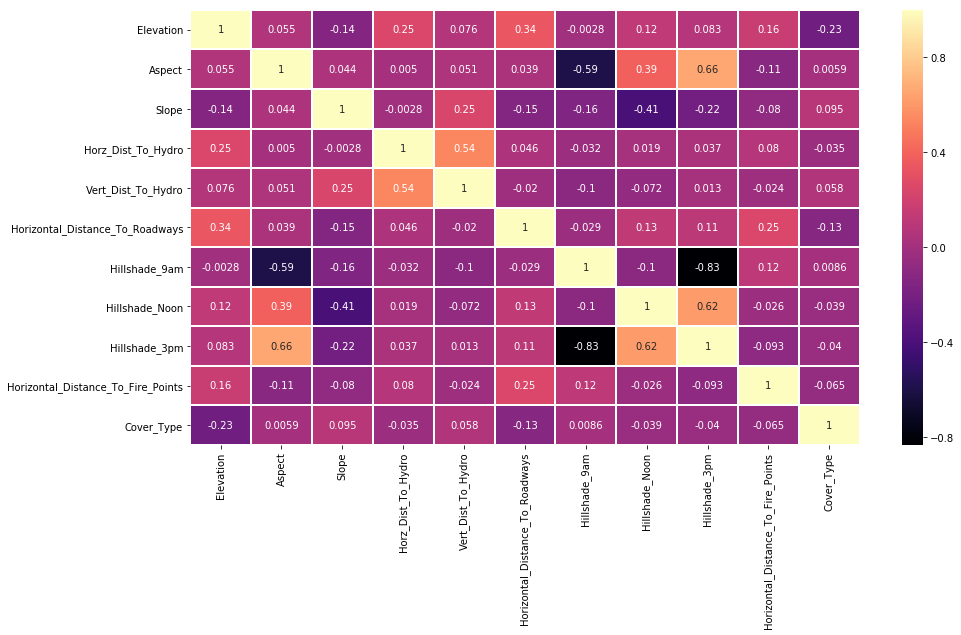

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(df_continous.corr(), cmap='magma', linecolor='white', linewidths=1, annot=True)

In [238]:
df_binary = df_forest_final.drop(columns=df_continous.columns)
df_binary['Cover_Type'] = df_forest_final['Cover_Type']
df_binary.head()

Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type10  \
11                 0                 0                 0            0   
21                 0                 0                 0            0   
27                 0                 0                 0            0   
35                 0                 0                 0            0   
61                 0                 0                 0            0   

    Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
11            0            0            0            0            0   
21            0            0            0            0            0   
27            0            0            0            0            0   
35            0            0            0            0            0   
61            0            0            0            0            0   

    Soil_Type17  ...  Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  \
11            0  ...            0            0           0            0   
21            0  ...            0            0           0            0   
27            0  ...            0            0           0            0   
35            0  ...            0            0           0            0   
61            0  ...            0            0           0            0   

    Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Cover_Type  
11           0           0           0           0           0           2  
21           0           0           0           0           0           2  
27           0           0           0           0           0           2  
35           0           0           0           0           0           2  
61           0           0           0           0           0           2  

[5 rows x 42 columns]

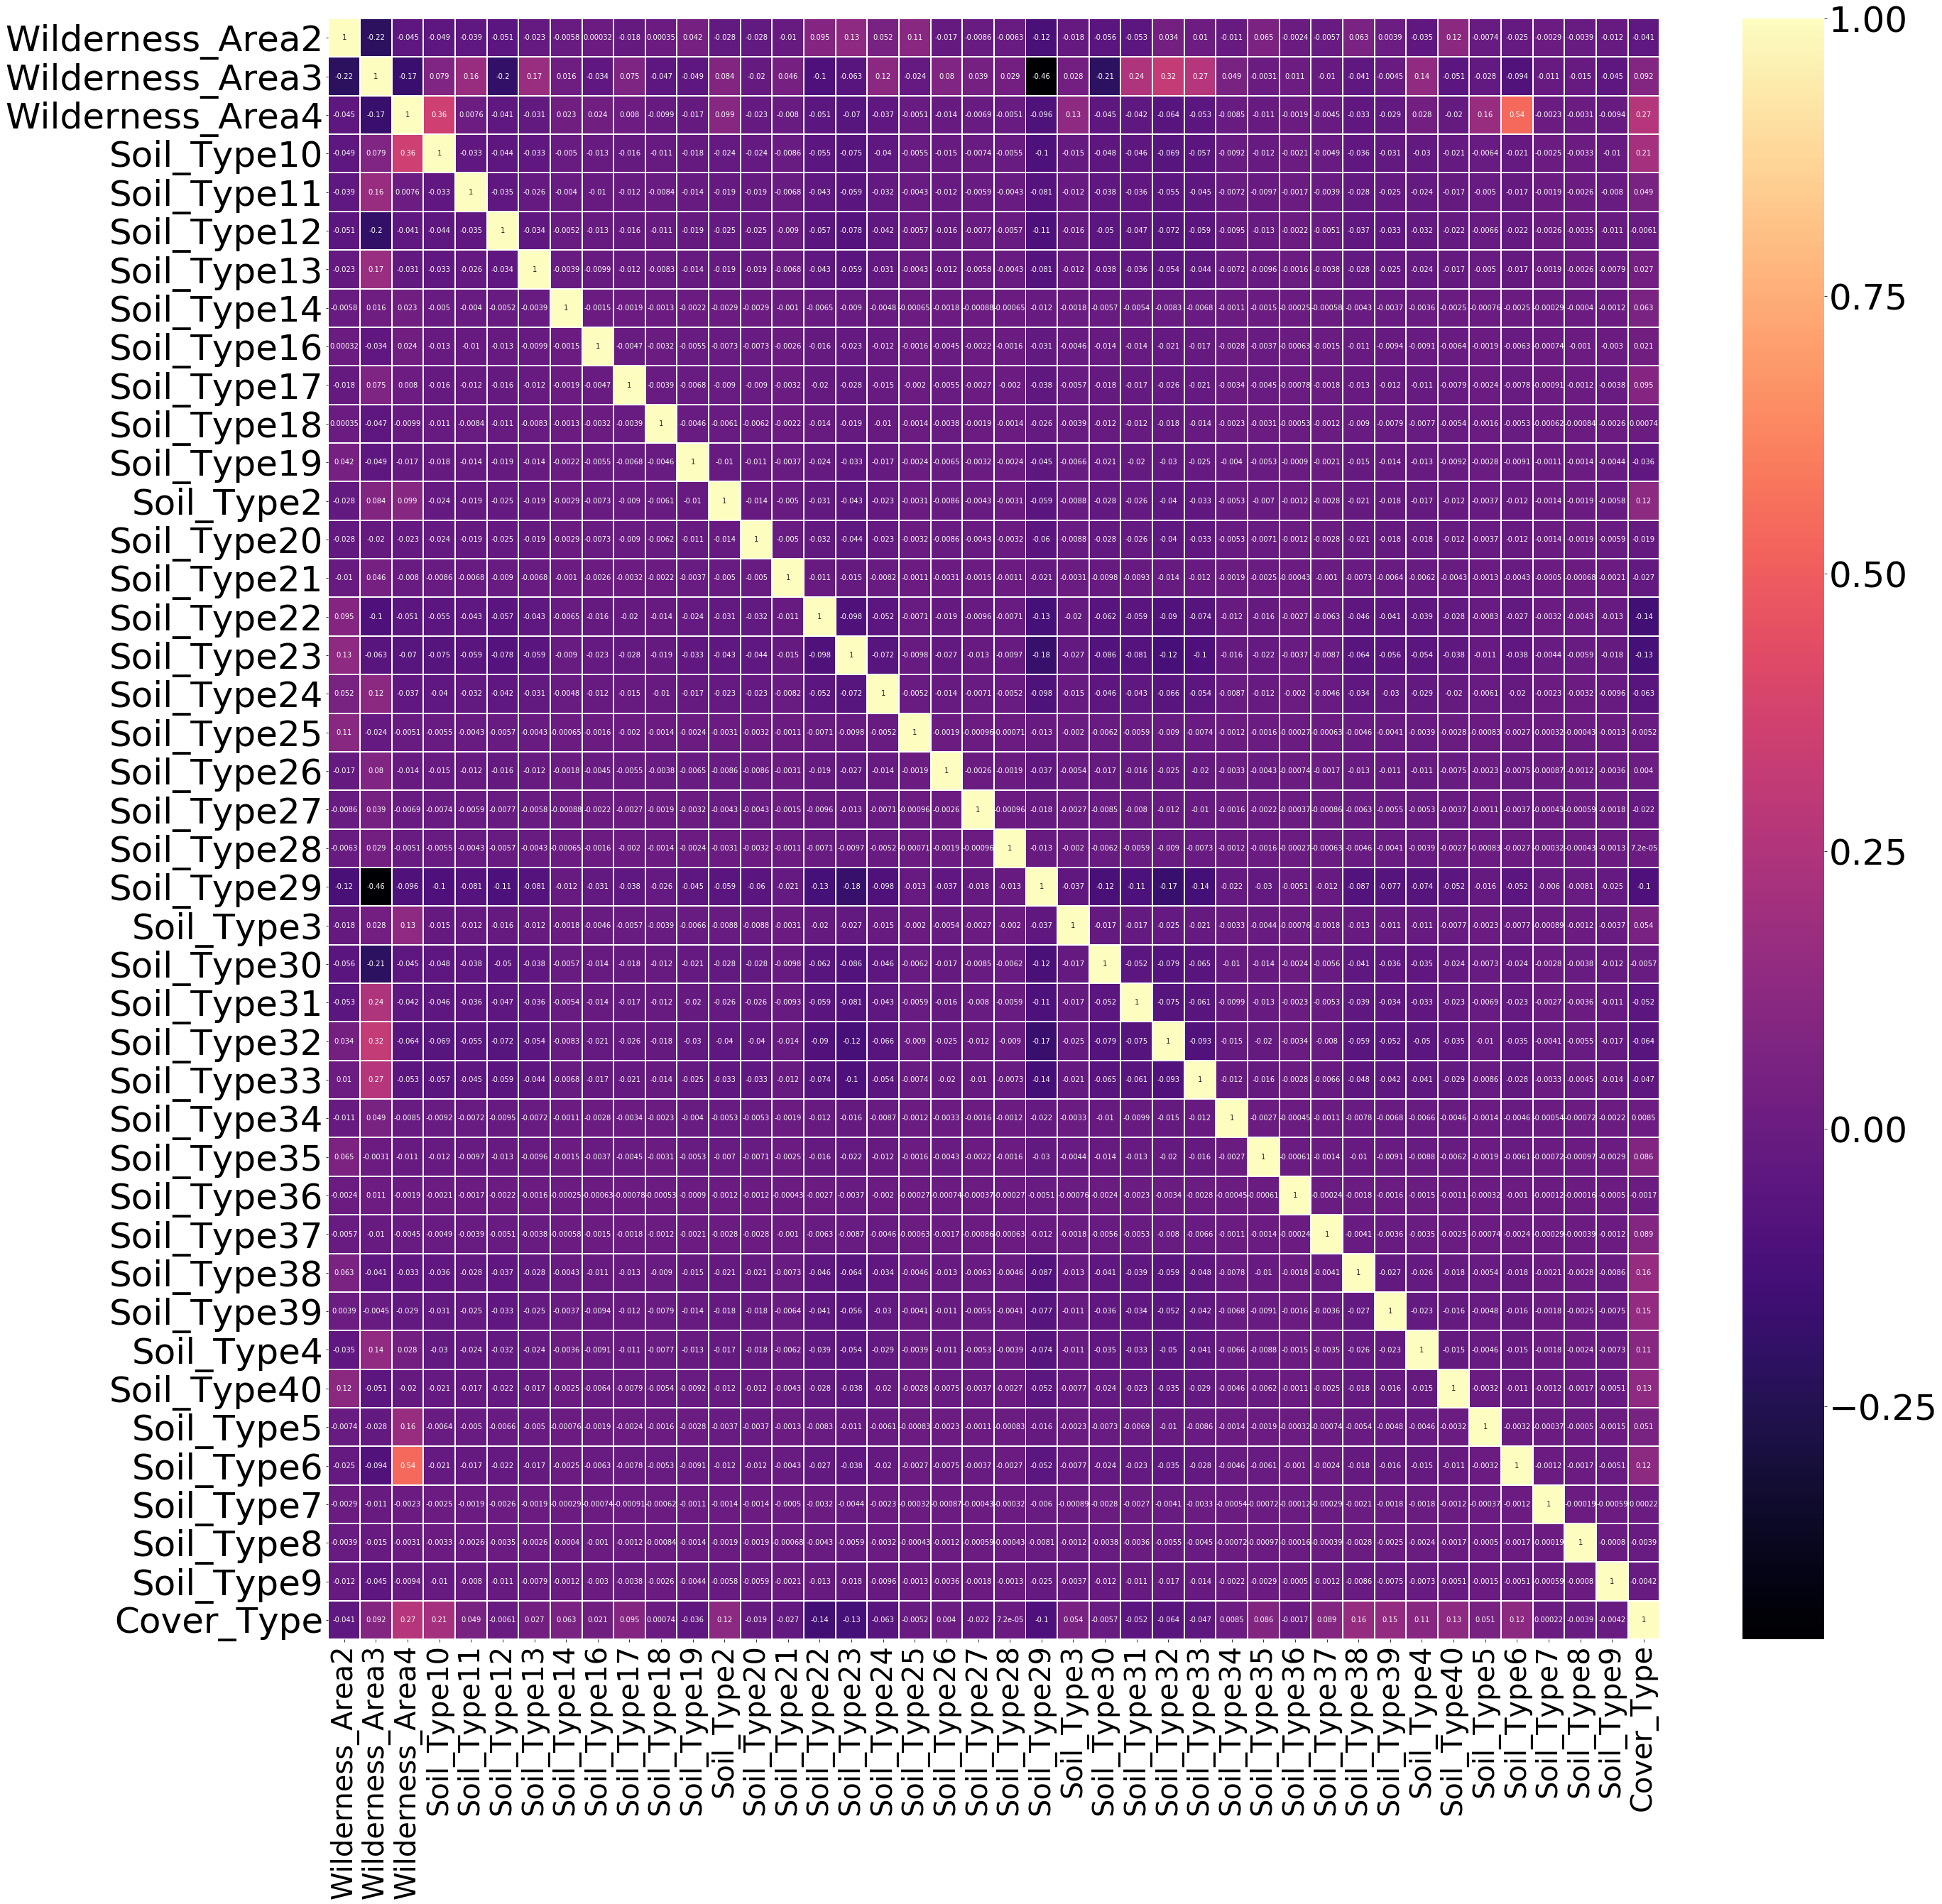

In [243]:
plt.figure(figsize=(42,42))
sns.heatmap(df_binary.corr(), cmap='magma', linecolor='white', linewidths=1, annot=True)

In [272]:
target = df_forest_final.Cover_Type
features = df_forest_final.drop(columns=['Cover_Type'])

In [273]:
features

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
11           2886     151     11                 371                  26   
21           2880     209     17                 216                  30   
27           2962     148     16                 323                  23   
35           2900      45     19                 242                  20   
61           2952     107     11                  42                   7   
...           ...     ...    ...                 ...                 ...   
581007       2396     153     20                  85                  17   
581008       2391     152     19                  67                  12   
581009       2386     159     17                  60                   7   
581010       2384     170     15                  60                   5   
581011       2383     165     13                  60                   4   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
11                                 5253            234             240   
21                                 4986            206             253   
27                                 5916            240             236   
35                                 5199            221             195   
61                                 5845            239             226   
...                                 ...            ...             ...   
581007                              108            240             237   
581008                               95            240             237   
581009                               90            236             241   
581010                               90            230             245   
581011                               67            231             244   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
11                136                                4051  ...            0   
21                179                                4323  ...            0   
27                120                                3395  ...            0   
35                100                                4115  ...            0   
61                116                                3509  ...            0   
...               ...                                 ...  ...          ...   
581007            118                                 837  ...            0   
581008            119                                 845  ...            0   
581009            130                                 854  ...            0   
581010            143                                 864  ...            0   
581011            141                                 875  ...            0   

        Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  \
11                0            0           0            0           0   
21                0            0           0            0           0   
27                0            0           0            0           0   
35                0            0           0            0           0   
61                0            0           0            0           0   
...             ...          ...         ...          ...         ...   
581007            0            0           0            0           0   
581008            0            0           0            0           0   
581009            0            0           0            0           0   
581010            0            0           0            0           0   
581011            0            0           0            0           0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  
11               0           0           0           0  
21               0           0           0           0  
27               0           0           0           0  
35               0           0           0           0  
61               0           0           0           0  
...            ...         ...        

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [178]:
X_train.shape

(283603, 51)

In [279]:
features.shape

(472673, 51)

In [280]:
target.shape

(472673,)

In [244]:
# Statistical test 

In [249]:
ols_model = sm.OLS(target,features)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 3.161e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:44:08   Log-Likelihood:            -7.3218e+05
No. Observations:              472673   AIC:                         1.464e+06
Df Residuals:                  472622   BIC:                         1.465e+06
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Elevation                             -0.0011   1.28e-05    -87.989      0.000      -0.001      -0.001
Aspect                                 0.0003   2.08e-05     16.026      0.000       0.000       0.000
Slope                                  0.0165      0.000     42.872      0.000       0.016       0.017
Horz_Dist_To_Hydro                    -0.0001   1.18e-05    -10.815      0.000      -0.000      -0.000
Vert_Dist_To_Hydro                     0.0009   5.29e-05     16.569      0.000       0.001       0.001
Horizontal_Distance_To_Roadways     4.846e-07   1.37e-06      0.353      0.724   -2.21e-06    3.18e-06
Hillshade_9am                          0.0279      0.000     72.171      0.000       0.027       0.029
Hillshade_Noon                        -0.0177      0.000    -45.481      0.000      -0.018      -0.017
Hillshade_3pm                          0.0199      0.000     59.923      0.000       0.019       0.021
Horizontal_Distance_To_Fire_Points  5.297e-05   1.82e-06     29.104      0.000    4.94e-05    5.65e-05
Wilderness_Area2                       0.3850      0.009     41.008      0.000       0.367       0.403
Wilderness_Area3                       0.7077      0.007    104.039      0.000       0.694       0.721
Wilderness_Area4                       1.4588      0.015     95.714      0.000       1.429       1.489
Soil_Type10                            0.1349      0.047      2.860      0.004       0.042       0.227
Soil_Type11                           -0.5301      0.049    -10.917      0.000      -0.625      -0.435
Soil_Type12                           -0.1905      0.049     -3.912      0.000      -0.286      -0.095
Soil_Type13                           -0.4265      0.049     -8.779      0.000      -0.522      -0.331
Soil_Type14                            2.0979      0.082     25.441      0.000       1.936       2.260
Soil_Type16                           -0.0470      0.055     -0.862      0.389      -0.154       0.060
Soil_Type17                            0.6732      0.052     12.917      0.000       0.571       0.775
Soil_Type18                           -0.4855      0.058     -8.398      0.000      -0.599      -0.372
Soil_Type19                           -0.5079      0.052     -9.858      0.000      -0.609      -0.407
Soil_Type2                             0.1557      0.049      3.180      0.001       0.060       0.252
Soil_Type20                           -0.5485      0.050    -11.001      0.000      -0.646      -0.451
Soil_Type21                           -1.3051      0.062    -20.977      0.000      -1.427      -1.183
Soil_Type22                           -0.6687      0.049    -13.760      0.000      -0.764      -0.573
Soil_Type23                           -0.6038      0.048    -12.514      0.000      -0.698      

In [250]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif.round(1)

VIF Factor                            features
0        532.5                           Elevation
1          5.6                              Aspect
2         10.9                               Slope
3          4.7                  Horz_Dist_To_Hydro
4          2.9                  Vert_Dist_To_Hydro
5          5.5     Horizontal_Distance_To_Roadways
6       2551.0                       Hillshade_9am
7       2820.4                      Hillshade_Noon
8        864.0                       Hillshade_3pm
9          5.2  Horizontal_Distance_To_Fire_Points
10         1.7                    Wilderness_Area2
11         7.7                    Wilderness_Area3
12         3.0                    Wilderness_Area4
13        32.9                         Soil_Type10
14        22.0                         Soil_Type11
15        37.6                         Soil_Type12
16        21.6                         Soil_Type13
17         1.5                         Soil_Type14
18         4.1                         Soil_Type16
19         5.7                         Soil_Type17
20         3.3                         Soil_Type18
21         7.6                         Soil_Type19
22        12.0                          Soil_Type2
23        12.6                         Soil_Type20
24         2.5                         Soil_Type21
25        57.0                         Soil_Type22
26       100.6                         Soil_Type23
27        31.8                         Soil_Type24
28         1.6                         Soil_Type25
29         5.4                         Soil_Type26
30         2.1                         Soil_Type27
31         1.6                         Soil_Type28
32       172.0                         Soil_Type29
33         5.3                          Soil_Type3
34        44.8                         Soil_Type30
35        40.4                         Soil_Type31
36        86.7                         Soil_Type32
37        59.8                         Soil_Type33
38         2.7                         Soil_Type34
39         4.0                         Soil_Type35
40         1.1                         Soil_Type36
41         1.5                         Soil_Type37
42        26.2                         Soil_Type38
43        20.5                         Soil_Type39
44        18.2                          Soil_Type4
45        10.1                         Soil_Type40
46         1.7                          Soil_Type5
47         9.0                          Soil_Type6
48         1.1                          Soil_Type7
49         1.2                          Soil_Type8
50         3.0                          Soil_Type9

In [255]:
X = features.drop(columns=['Hillshade_Noon'])
Y = target

In [252]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0        497.5                           Elevation
1          5.6                              Aspect
2         10.0                               Slope
3          4.7                  Horz_Dist_To_Hydro
4          2.9                  Vert_Dist_To_Hydro
5          5.4     Horizontal_Distance_To_Roadways
6        324.5                       Hillshade_9am
7         88.2                       Hillshade_3pm
8          5.2  Horizontal_Distance_To_Fire_Points
9          1.7                    Wilderness_Area2
10         7.6                    Wilderness_Area3
11         2.8                    Wilderness_Area4
12        21.5                         Soil_Type10
13        14.7                         Soil_Type11
14        25.2                         Soil_Type12
15        15.8                         Soil_Type13
16         1.3                         Soil_Type14
17         3.0                         Soil_Type16
18         4.1                         Soil_Type17
19         2.5                         Soil_Type18
20         5.5                         Soil_Type19
21         8.3                          Soil_Type2
22         8.6                         Soil_Type20
23         2.0                         Soil_Type21
24        39.4                         Soil_Type22
25        69.1                         Soil_Type23
26        21.3                         Soil_Type24
27         1.5                         Soil_Type25
28         4.0                         Soil_Type26
29         1.8                         Soil_Type27
30         1.4                         Soil_Type28
31       116.0                         Soil_Type29
32         4.0                          Soil_Type3
33        30.8                         Soil_Type30
34        27.6                         Soil_Type31
35        60.5                         Soil_Type32
36        41.6                         Soil_Type33
37         2.2                         Soil_Type34
38         3.2                         Soil_Type35
39         1.1                         Soil_Type36
40         1.3                         Soil_Type37
41        18.7                         Soil_Type38
42        14.6                         Soil_Type39
43        13.2                          Soil_Type4
44         7.4                         Soil_Type40
45         1.5                          Soil_Type5
46         6.5                          Soil_Type6
47         1.1                          Soil_Type7
48         1.1                          Soil_Type8
49         2.3                          Soil_Type9

In [256]:
X = X.drop(columns=['Elevation'])

In [257]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0          5.6                              Aspect
1          9.4                               Slope
2          4.5                  Horz_Dist_To_Hydro
3          2.9                  Vert_Dist_To_Hydro
4          4.9     Horizontal_Distance_To_Roadways
5        240.1                       Hillshade_9am
6         72.6                       Hillshade_3pm
7          5.2  Horizontal_Distance_To_Fire_Points
8          1.6                    Wilderness_Area2
9          7.6                    Wilderness_Area3
10         2.8                    Wilderness_Area4
11        20.3                         Soil_Type10
12        13.9                         Soil_Type11
13        23.6                         Soil_Type12
14        14.7                         Soil_Type13
15         1.3                         Soil_Type14
16         2.9                         Soil_Type16
17         4.0                         Soil_Type17
18         2.4                         Soil_Type18
19         5.0                         Soil_Type19
20         8.1                          Soil_Type2
21         8.0                         Soil_Type20
22         1.9                         Soil_Type21
23        34.8                         Soil_Type22
24        61.5                         Soil_Type23
25        18.9                         Soil_Type24
26         1.4                         Soil_Type25
27         3.8                         Soil_Type26
28         1.7                         Soil_Type27
29         1.4                         Soil_Type28
30       104.5                         Soil_Type29
31         4.0                          Soil_Type3
32        28.4                         Soil_Type30
33        24.8                         Soil_Type31
34        54.0                         Soil_Type32
35        37.6                         Soil_Type33
36         2.1                         Soil_Type34
37         2.8                         Soil_Type35
38         1.1                         Soil_Type36
39         1.3                         Soil_Type37
40        16.0                         Soil_Type38
41        12.5                         Soil_Type39
42        12.8                          Soil_Type4
43         6.4                         Soil_Type40
44         1.5                          Soil_Type5
45         6.3                          Soil_Type6
46         1.1                          Soil_Type7
47         1.1                          Soil_Type8
48         2.2                          Soil_Type9

In [258]:
X = X.drop(columns=['Hillshade_9am'])
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0          5.5                              Aspect
1          8.4                               Slope
2          4.4                  Horz_Dist_To_Hydro
3          2.9                  Vert_Dist_To_Hydro
4          4.9     Horizontal_Distance_To_Roadways
5         39.2                       Hillshade_3pm
6          5.2  Horizontal_Distance_To_Fire_Points
7          1.6                    Wilderness_Area2
8          7.5                    Wilderness_Area3
9          2.7                    Wilderness_Area4
10         3.5                         Soil_Type10
11         2.3                         Soil_Type11
12         2.8                         Soil_Type12
13         2.7                         Soil_Type13
14         1.0                         Soil_Type14
15         1.2                         Soil_Type16
16         1.3                         Soil_Type17
17         1.1                         Soil_Type18
18         1.3                         Soil_Type19
19         1.7                          Soil_Type2
20         1.6                         Soil_Type20
21         1.1                         Soil_Type21
22         4.0                         Soil_Type22
23         6.3                         Soil_Type23
24         3.2                         Soil_Type24
25         1.1                         Soil_Type25
26         1.3                         Soil_Type26
27         1.1                         Soil_Type27
28         1.0                         Soil_Type28
29        10.1                         Soil_Type29
30         1.4                          Soil_Type3
31         3.3                         Soil_Type30
32         3.7                         Soil_Type31
33         6.7                         Soil_Type32
34         5.4                         Soil_Type33
35         1.1                         Soil_Type34
36         1.2                         Soil_Type35
37         1.0                         Soil_Type36
38         1.0                         Soil_Type37
39         2.4                         Soil_Type38
40         2.2                         Soil_Type39
41         2.3                          Soil_Type4
42         1.5                         Soil_Type40
43         1.1                          Soil_Type5
44         2.1                          Soil_Type6
45         1.0                          Soil_Type7
46         1.0                          Soil_Type8
47         1.1                          Soil_Type9

In [259]:
Xbackup = X

In [260]:
X = X.drop(columns=['Soil_Type29'])
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0          4.9                              Aspect
1          5.9                               Slope
2          4.3                  Horz_Dist_To_Hydro
3          2.8                  Vert_Dist_To_Hydro
4          4.7     Horizontal_Distance_To_Roadways
5         19.1                       Hillshade_3pm
6          4.8  Horizontal_Distance_To_Fire_Points
7          1.6                    Wilderness_Area2
8          7.5                    Wilderness_Area3
9          2.6                    Wilderness_Area4
10         2.1                         Soil_Type10
11         1.5                         Soil_Type11
12         1.2                         Soil_Type12
13         1.5                         Soil_Type13
14         1.0                         Soil_Type14
15         1.0                         Soil_Type16
16         1.1                         Soil_Type17
17         1.0                         Soil_Type18
18         1.1                         Soil_Type19
19         1.3                          Soil_Type2
20         1.1                         Soil_Type20
21         1.0                         Soil_Type21
22         1.4                         Soil_Type22
23         2.0                         Soil_Type23
24         1.6                         Soil_Type24
25         1.0                         Soil_Type25
26         1.1                         Soil_Type26
27         1.0                         Soil_Type27
28         1.0                         Soil_Type28
29         1.2                          Soil_Type3
30         1.2                         Soil_Type30
31         1.9                         Soil_Type31
32         3.0                         Soil_Type32
33         2.4                         Soil_Type33
34         1.0                         Soil_Type34
35         1.0                         Soil_Type35
36         1.0                         Soil_Type36
37         1.0                         Soil_Type37
38         1.2                         Soil_Type38
39         1.2                         Soil_Type39
40         1.5                          Soil_Type4
41         1.1                         Soil_Type40
42         1.1                          Soil_Type5
43         1.8                          Soil_Type6
44         1.0                          Soil_Type7
45         1.0                          Soil_Type8
46         1.0                          Soil_Type9

In [261]:
X.columns

Index(['Aspect', 'Slope', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9'],
      dtype='object')

In [ ]:
#Univariate Feature Selection 

In [179]:
X_train

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
557011       2779     209     17                 120                  -6   
337487       2586     355     19                 480                  65   
469249       3055     207      5                 582                  -3   
91184        2789     338      8                  90                  12   
335175       2827      45      7                 190                  13   
...           ...     ...    ...                 ...                 ...   
328526       3022      43     12                 134                  18   
455782       3100      97     20                 313                  59   
170742       3266      10      7                 764                  75   
186049       3246      68      5                 510                   2   
160459       3047     280      7                 201                  17   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
557011                             1655            205             254   
337487                              212            186             204   
469249                              180            217             245   
91184                              3275            202             228   
335175                             1124            222             225   
...                                 ...            ...             ...   
328526                             2089            222             214   
455782                             1298            248             207   
170742                             5943            213             227   
186049                             4387            225             230   
160459                             5568            201             241   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
557011            179                                1112  ...            0   
337487            153                                 800  ...            0   
469249            164                                1245  ...            0   
91184             165                                2897  ...            0   
335175            138                                2713  ...            0   
...               ...                                 ...  ...          ...   
328526            125                                1579  ...            0   
455782             80                                1195  ...            0   
170742            151                                2678  ...            0   
186049            139                                2423  ...            0   
160459            179                                2059  ...            0   

        Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  \
557011            0            0           0            0           0   
337487            0            0           0            0           0   
469249            0            0           0            0           0   
91184             0            0           0            0           0   
335175            0            0           0            0           0   
...             ...          ...         ...          ...         ...   
328526            0            0           0            0           0   
455782            0            0           0            0           0   
170742            0            0           0            0           0   
186049            0            0           0            0           0   
160459            0            0           0            0           0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  
557011           0           0           0           0  
337487           0           0           0           0  
469249           0           0           0           0  
91184            0           0           0           0  
335175           0           0           0           0  
...            ...         ...        

In [183]:
#Mutual Info Classif test 
fselect1 = SelectKBest(mutual_info_classif, k=15)
train = fselect1.fit_transform(X_train, Y_train)
fselect1.get_support()


array([ True,  True, False, False, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False])

In [184]:
feature_index = fselect1.get_support()
feature_names = features.columns[feature_index]
feature_names

Index(['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area4', 'Soil_Type10',
       'Soil_Type12', 'Soil_Type2', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type29', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type6'],
      dtype='object')

In [185]:
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
rfe_logistic = RFECV(estimator=logistic, step=5, cv= 10)
rfe_logistic.fit_transform(X_train, Y_train)

array([[2779,   17,   -6,  205,  254,  179],
       [2586,   19,   65,  186,  204,  153],
       [3055,    5,   -3,  217,  245,  164],
       ...,
       [3266,    7,   75,  213,  227,  151],
       [3246,    5,    2,  225,  230,  139],
       [3047,    7,   17,  201,  241,  179]], dtype=int64)

In [186]:
rfe_logistic.support_

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [188]:
rfe_ranks = rfe_logistic.ranking_
rfe_ranks

array([ 1,  2,  1,  2,  1,  2,  1,  1,  1,  2,  5,  3,  3,  4,  6,  3,  5,
        9,  9,  7,  9,  7,  4,  7,  8,  3,  3,  6, 10,  8,  8, 10,  2,  7,
        5,  6,  5,  5,  9,  7, 10,  9,  4,  4,  4,  6,  8,  6, 10, 10,  8])

In [209]:
feature_idx1 = rfe_logistic.support_
feature_names1 = features.columns[feature_idx1]
feature_names1

Index(['Elevation', 'Slope', 'Vert_Dist_To_Hydro', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm'],
      dtype='object')

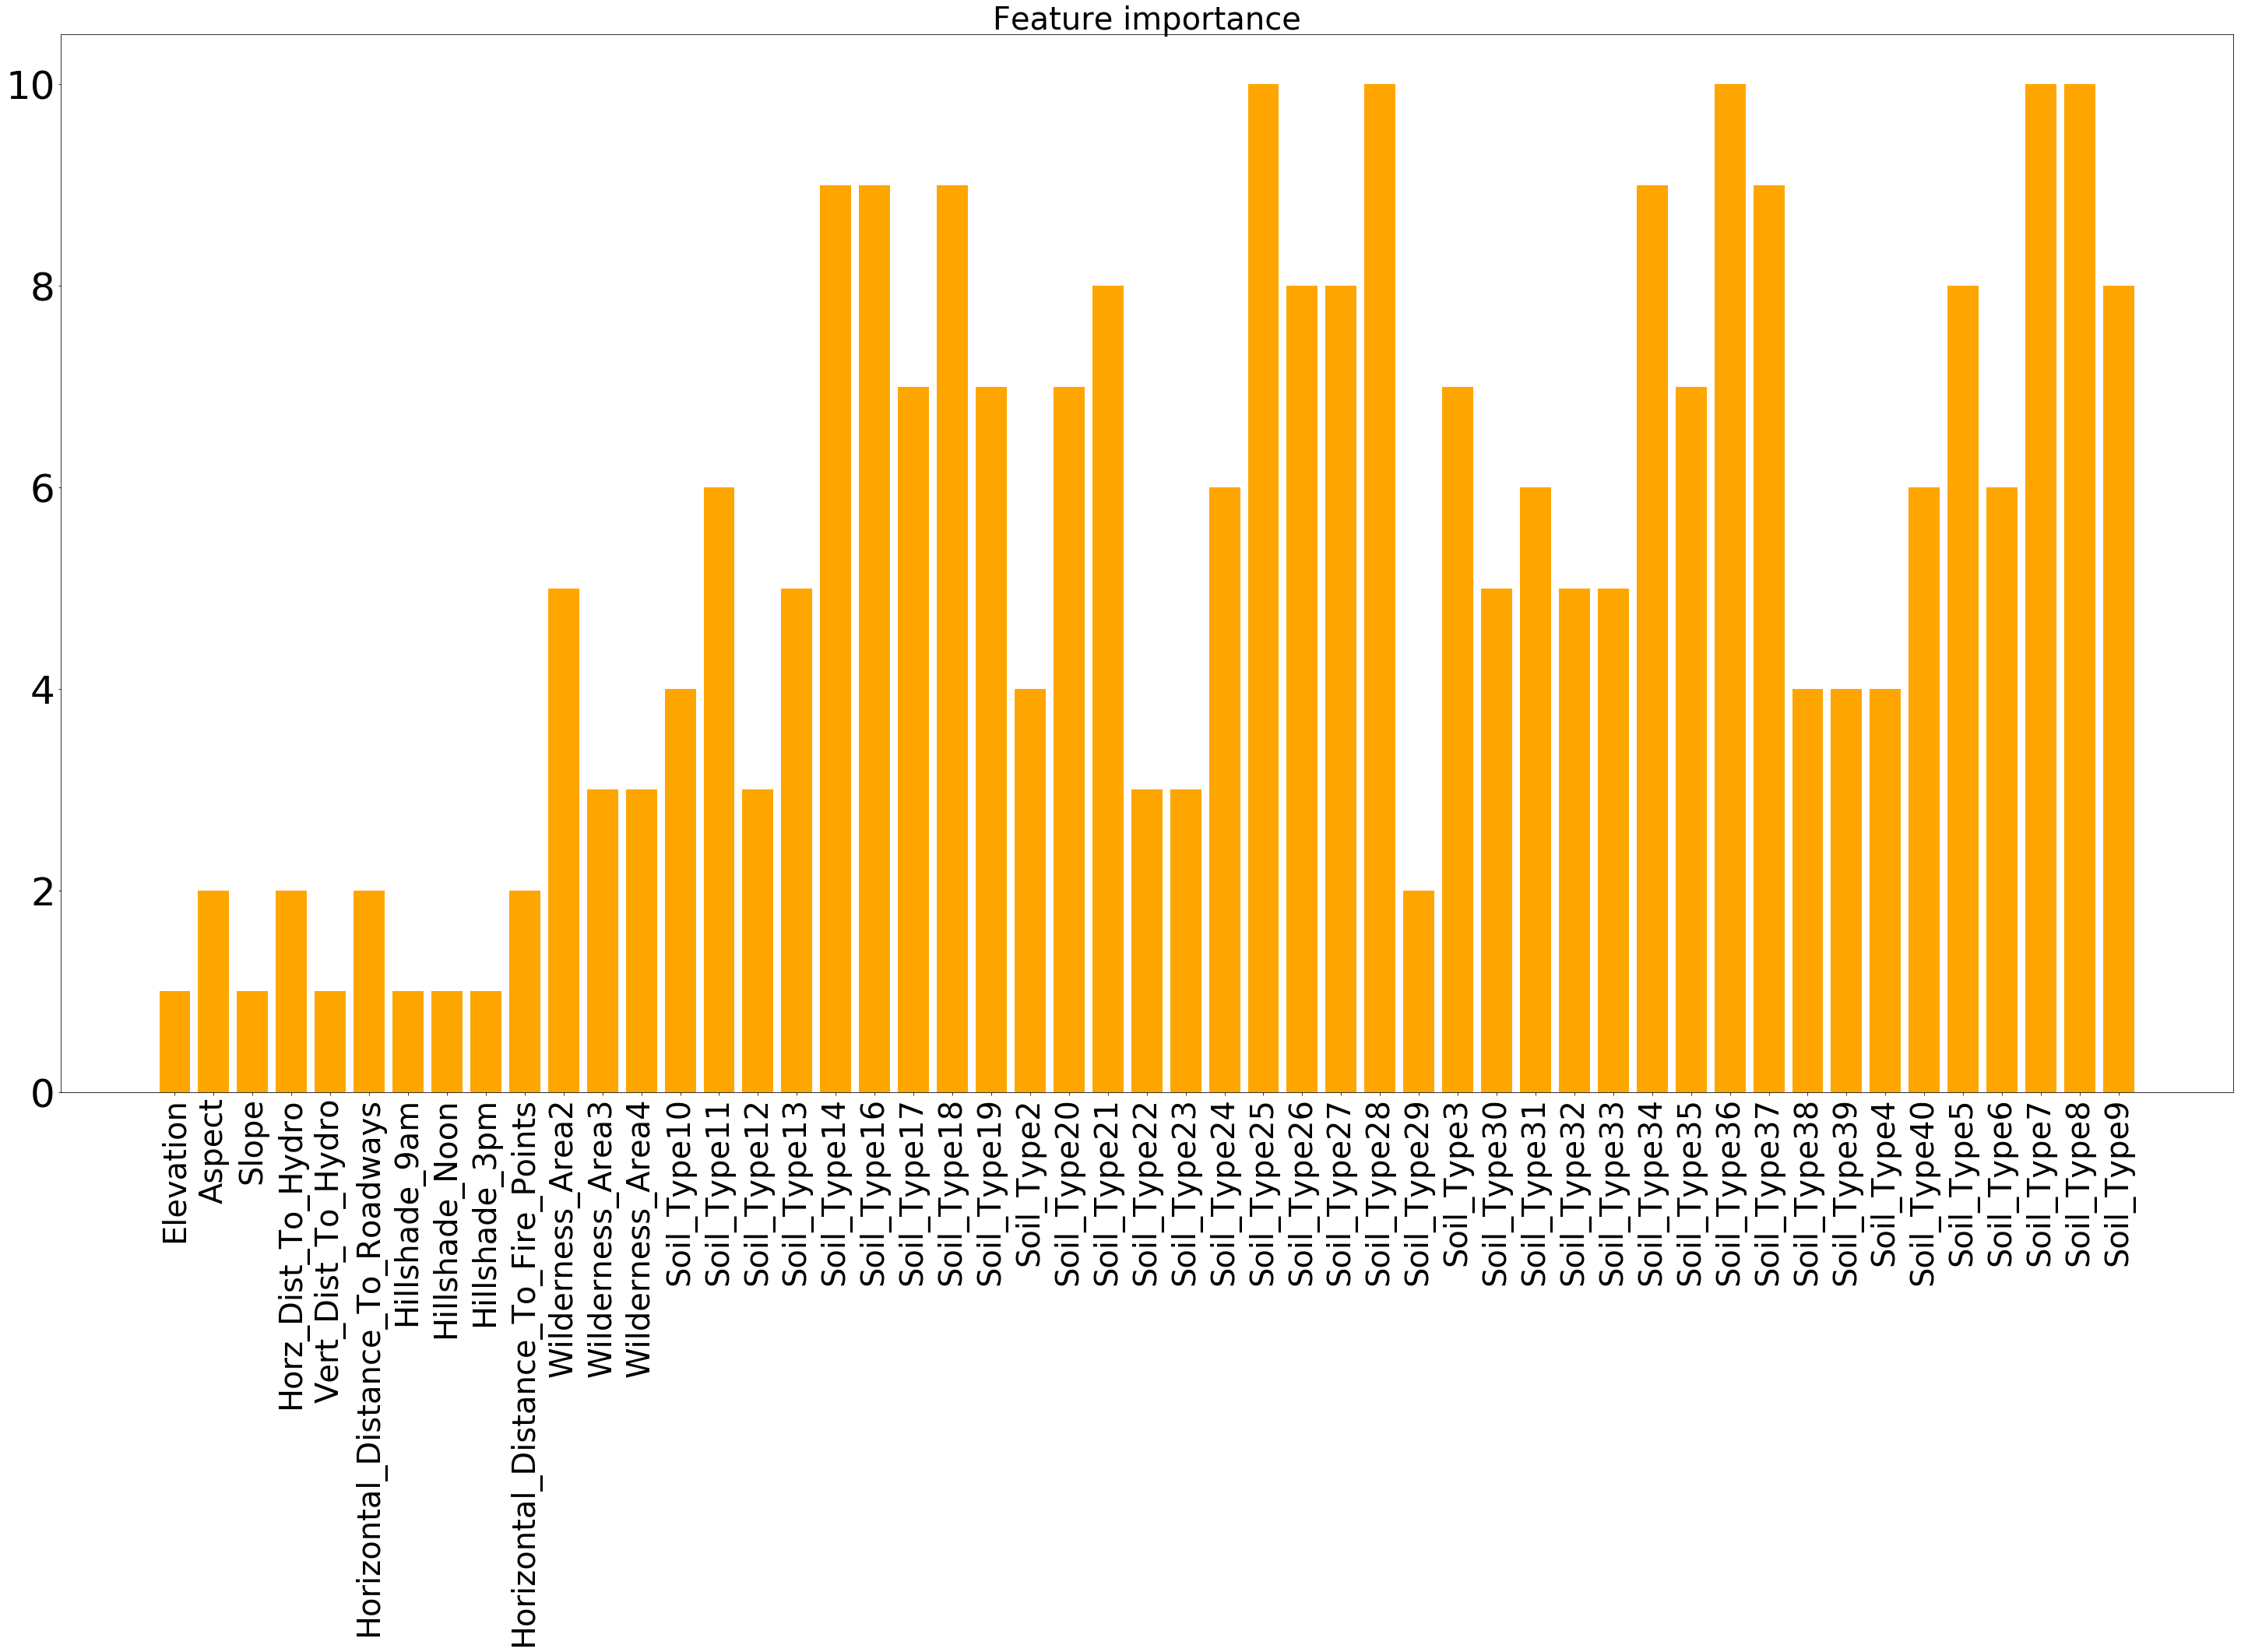

In [192]:
params = {'axes.labelsize': 280,'axes.titlesize':40, 'legend.fontsize': 18, 'xtick.labelsize': 40, 'ytick.labelsize': 50}
plt.figure(figsize=(50,25))
plt.rcParams.update(params)
ax = plt.bar(range(X_train.shape[1]), rfe_ranks, color='orange', align = 'center')
ax = plt.title('Feature importance')
ax = plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

In [193]:
#Feature Selection using Feature Importance in Decision Trees

In [202]:
import time

start = time.time()

rand_forest = RandomForestClassifier(n_estimators=10, random_state=100)
rfe_rf = RFECV(estimator=rand_forest, step=1, cv=5)
rfe_rf.fit_transform(X_train, Y_train)


end = time.time()

In [203]:
print('Time Taken : '+ str(end - start))

Time Taken : 1500.9320878982544


In [204]:
rfe_rf

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [205]:
rfe_rf.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False])

In [211]:
rfe_rf.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  4,
       18, 13,  6, 19, 10,  1,  8, 11,  1,  1,  1, 22, 16, 15, 23,  1,  9,
        3,  1,  1,  1, 17,  7, 25, 14,  1,  1,  1,  2, 20, 12, 26, 24, 21])

In [210]:
feature_idx2 = rfe_rf.support_
feature_names2 = features.columns[feature_idx]
feature_names2

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type29', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type4'],
      dtype='object')

In [213]:
xgb = XGBClassifier()
select_xgb = SelectFromModel(xgb, threshold='median')
select_xgb

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
        norm_order=1, prefit=False, threshold='median')

In [214]:
select_xgb.fit_transform(X_train, Y_train)

array([[2779,  209,  120, ...,    0,    0,    0],
       [2586,  355,  480, ...,    0,    0,    0],
       [3055,  207,  582, ...,    0,    0,    0],
       ...,
       [3266,   10,  764, ...,    0,    0,    0],
       [3246,   68,  510, ...,    0,    0,    0],
       [3047,  280,  201, ...,    0,    0,    0]], dtype=int64)

In [215]:
feature_idx3 = select_xgb.get_support()
feature_names3 = features.columns[feature_idx3]
feature_names3

Index(['Elevation', 'Aspect', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type5'],
      dtype='object')

In [221]:
#Feature Selection 

features_selected1 = ['Elevation', 'Aspect', 'Slope','Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type5']    


features_selected2 = ['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area4', 'Soil_Type10',
       'Soil_Type12', 'Soil_Type2', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type29', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type6']


features_selected3 = ['Elevation', 'Slope', 'Vert_Dist_To_Hydro', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm']

In [ ]:
#Features after Removing Multicollinearity & Reducing Dimensions using PCA and VIF

In [262]:
features_selected4 = ['Aspect', 'Slope', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9']


In [219]:
# Modeling using the selected features 

In [226]:
X_train_1 = X_train[features_selected1]
X_train_2 = X_train[features_selected2]
X_train_3 = X_train[features_selected3]

X_test_1 = X_test[features_selected1]
X_test_2 = X_test[features_selected2]
X_test_3 = X_test[features_selected3]


In [230]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_1, Y_train)
Y_pred1 = knn1.predict(X_test_1)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_2, Y_train)
Y_pred2 = knn2.predict(X_test_2)
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_3, Y_train)
Y_pred3 = knn3.predict(X_test_3)


In [232]:
print ("KNN Model 1 Accuracy Score: " , classification_report(Y_test, Y_pred))
print ("KNN Model 2 Accuracy Score: " ,classification_report(Y_test, Y_pred1))
print ("KNN Model 3 Accuracy Score: " ,classification_report(Y_test, Y_pred2))
print ("KNN Model 4 Accuracy Score: " ,classification_report(Y_test, Y_pred3))

KNN Model 1 Accuracy Score:               precision    recall  f1-score   support

          1       0.96      0.96      0.96     73497
          2       0.96      0.97      0.96     93115
          3       0.93      0.95      0.94      8281
          4       0.89      0.63      0.74       322
          5       0.91      0.86      0.88      3064
          6       0.91      0.90      0.90      4661
          7       0.97      0.95      0.96      6130

avg / total       0.96      0.96      0.96    189070

KNN Model 2 Accuracy Score:               precision    recall  f1-score   support

          1       0.95      0.94      0.95     73497
          2       0.95      0.96      0.95     93115
          3       0.91      0.93      0.92      8281
          4       0.90      0.58      0.71       322
          5       0.87      0.80      0.83      3064
          6       0.89      0.86      0.88      4661
          7       0.96      0.94      0.95      6130

avg / total       0.94      0.94    

In [233]:
logistic = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
logistic1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic1.fit(X_train_1, Y_train)
Y_pred1 = logistic1.predict(X_test_1)
logistic2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic2.fit(X_train_2, Y_train)
Y_pred2 = logistic2.predict(X_test_2)
logistic3 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic3.fit(X_train_3, Y_train)
Y_pred3 = logistic3.predict(X_test_3)



In [234]:
print ("Logistic Model 1 Accuracy Score: " , classification_report(Y_test, Y_pred))
print ("Logistic Model 2 Accuracy Score: " ,classification_report(Y_test, Y_pred1))
print ("Logistic Model 3 Accuracy Score: " ,classification_report(Y_test, Y_pred2))
print ("Logistic Model 4 Accuracy Score: " ,classification_report(Y_test, Y_pred3))

Logistic Model 1 Accuracy Score:               precision    recall  f1-score   support

          1       0.71      0.71      0.71     73497
          2       0.74      0.78      0.76     93115
          3       0.68      0.70      0.69      8281
          4       0.65      0.10      0.17       322
          5       0.00      0.00      0.00      3064
          6       0.50      0.42      0.45      4661
          7       0.73      0.53      0.61      6130

avg / total       0.71      0.72      0.71    189070

Logistic Model 2 Accuracy Score:               precision    recall  f1-score   support

          1       0.69      0.70      0.70     73497
          2       0.73      0.77      0.75     93115
          3       0.67      0.69      0.68      8281
          4       0.66      0.08      0.15       322
          5       0.00      0.00      0.00      3064
          6       0.50      0.38      0.43      4661
          7       0.71      0.49      0.58      6130

avg / total       0.69    

In [235]:
rforest = RandomForestClassifier(n_estimators=10)
rforest.fit(X_train, Y_train)
Y_pred = rforest.predict(X_test)
rforest1 = RandomForestClassifier(n_estimators=10)
rforest1.fit(X_train_1, Y_train)
Y_pred1 = rforest1.predict(X_test_1)
rforest2 = RandomForestClassifier(n_estimators=10)
rforest2.fit(X_train_2, Y_train)
Y_pred2 = rforest2.predict(X_test_2)
rforest3 = RandomForestClassifier(n_estimators=10)
rforest3.fit(X_train_3, Y_train)
Y_pred3 = rforest3.predict(X_test_3)



In [236]:
print ("Random forest Model 1 Accuracy Score: " ,classification_report(Y_test, Y_pred))
print ("Random forest 2 Accuracy Score: " ,classification_report(Y_test, Y_pred1))
print ("Random forest 3 Accuracy Score: " ,classification_report(Y_test, Y_pred2))
print ("Random forest 4 Accuracy Score: " ,classification_report(Y_test, Y_pred3))

Random forest Model 1 Accuracy Score:               precision    recall  f1-score   support

          1       0.93      0.94      0.94     73497
          2       0.94      0.95      0.94     93115
          3       0.91      0.92      0.91      8281
          4       0.91      0.62      0.74       322
          5       0.92      0.67      0.78      3064
          6       0.88      0.84      0.86      4661
          7       0.97      0.90      0.93      6130

avg / total       0.93      0.93      0.93    189070

Random forest 2 Accuracy Score:               precision    recall  f1-score   support

          1       0.92      0.93      0.93     73497
          2       0.93      0.94      0.94     93115
          3       0.91      0.91      0.91      8281
          4       0.89      0.62      0.73       322
          5       0.92      0.64      0.76      3064
          6       0.88      0.83      0.85      4661
          7       0.96      0.89      0.92      6130

avg / total       0.93

In [263]:
#Checking accuracy for Features selected after checking for Multi-colinearity

In [265]:
X_train_4 = X_train[features_selected4]
X_test_4 = X_test[features_selected4]


knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train_4, Y_train)
Y_pred4 = knn4.predict(X_test_4)


In [266]:
print ("Random forest Model 1 Accuracy Score: " ,classification_report(Y_test, Y_pred4))

Random forest Model 1 Accuracy Score:               precision    recall  f1-score   support

          1       0.87      0.89      0.88     73497
          2       0.89      0.90      0.90     93115
          3       0.83      0.75      0.79      8281
          4       0.81      0.41      0.54       322
          5       0.82      0.68      0.74      3064
          6       0.77      0.62      0.69      4661
          7       0.87      0.81      0.84      6130

avg / total       0.88      0.88      0.88    189070



In [267]:
# Principal Component Analysis without Outliers 

In [311]:
pca_cols = ['Elevation', 'Aspect', 'Slope','Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type5']    

pca_tar = ['Cover_Type']

In [323]:
pca_features = df_forest_final[pca_cols]
pca_features

Elevation  Aspect  Slope  Vert_Dist_To_Hydro  \
11           2886     151     11                  26   
21           2880     209     17                  30   
27           2962     148     16                  23   
35           2900      45     19                  20   
61           2952     107     11                   7   
...           ...     ...    ...                 ...   
581007       2396     153     20                  17   
581008       2391     152     19                  12   
581009       2386     159     17                   7   
581010       2384     170     15                   5   
581011       2383     165     13                   4   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
11                                 5253            234             240   
21                                 4986            206             253   
27                                 5916            240             236   
35                                 5199            221             195   
61                                 5845            239             226   
...                                 ...            ...             ...   
581007                              108            240             237   
581008                               95            240             237   
581009                               90            236             241   
581010                               90            230             245   
581011                               67            231             244   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area2  \
11                136                                4051                 0   
21                179                                4323                 0   
27                120                                3395                 0   
35                100                                4115                 0   
61                116                                3509                 0   
...               ...                                 ...               ...   
581007            118                                 837                 0   
581008            119                                 845                 0   
581009            130                                 854                 0   
581010            143                                 864                 0   
581011            141                                 875                 0   

        ...  Soil_Type2  Soil_Type22  Soil_Type29  Soil_Type30  Soil_Type32  \
11      ...           0            0            0            1            0   
21      ...           0            0            0            1            0   
27      ...           0            0            1            0            0   
35      ...           0            0            1            0            0   
61      ...           0            0            1            0            0   
...     ...         ...          ...          ...          ...          ...   
581007  ...           1            0            0            0            0   
581008  ...           1            0            0            0            0   
581009  ...           1            0            0            0            0   
581010  ...           1            0            0            0            0   
581011  ...           1            0            0            0            0   

        Soil_Type33  Soil_Type34  Soil_Type39  Soil_Type4  Soil_Type5  
11                0            0            0           0           0  
21                0            0            0           0           0  
27                0            0            0           0           0  
35                0            0            0           0           0  
61                0            0            0           0           0  
...             ...          ...          ...         ...         ...  
581007            0            0            

In [332]:
pca_target = df_forest_final[pca_tar]
pca_target.head()

Cover_Type
11           2
21           2
27           2
35           2
61           2

In [313]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(pca_features)
scaled_X

array([[-0.40094768, -0.02313565, -0.30626327, ..., -0.15300933,
        -0.14773475, -0.03107503],
       [-0.4256243 ,  0.50073124,  0.67979155, ..., -0.15300933,
        -0.14773475, -0.03107503],
       [-0.08837721, -0.05023221,  0.51544908, ..., -0.15300933,
        -0.14773475, -0.03107503],
       ...,
       [-2.45733235,  0.04912186,  0.67979155, ..., -0.15300933,
        -0.14773475, -0.03107503],
       [-2.46555788,  0.14847592,  0.35110661, ..., -0.15300933,
        -0.14773475, -0.03107503],
       [-2.46967065,  0.10331498,  0.02242167, ..., -0.15300933,
        -0.14773475, -0.03107503]])

In [314]:
pca1 = PCA()
p_comp1 = pca1.fit_transform(scaled_X)
p_comp1

array([[ 1.06759422, -2.01691823,  1.04253044, ...,  0.3183112 ,
        -0.39975515, -0.02336045],
       [-0.65139891, -1.85419014,  1.36939348, ...,  0.40190372,
        -0.2474309 , -0.0472325 ],
       [ 1.41053856, -2.27200471,  0.97120269, ...,  0.72331984,
        -0.22188734, -0.00767793],
       ...,
       [ 0.23615963,  3.0915097 ,  0.97232559, ...,  0.12203842,
         0.2707613 , -0.03306357],
       [-0.25883987,  2.92975422,  1.15630377, ...,  0.07920813,
         0.25038724, -0.03699142],
       [-0.18307607,  2.84243906,  1.18195753, ...,  0.0268746 ,
         0.21545509, -0.00552819]])

In [315]:
explained_variance=pca1.explained_variance_ratio_
explained_variance

array([1.08901897e-01, 9.85230081e-02, 7.17350396e-02, 6.27108892e-02,
       5.20168596e-02, 4.51513020e-02, 4.29486520e-02, 4.24562191e-02,
       4.09584028e-02, 4.00055120e-02, 3.96042619e-02, 3.92774122e-02,
       3.88239225e-02, 3.86953576e-02, 3.82088304e-02, 3.46132834e-02,
       3.09905876e-02, 3.00623326e-02, 2.37560847e-02, 2.01413005e-02,
       1.85903627e-02, 1.44316063e-02, 1.23999779e-02, 8.80149136e-03,
       6.16013602e-03, 3.52709730e-05])

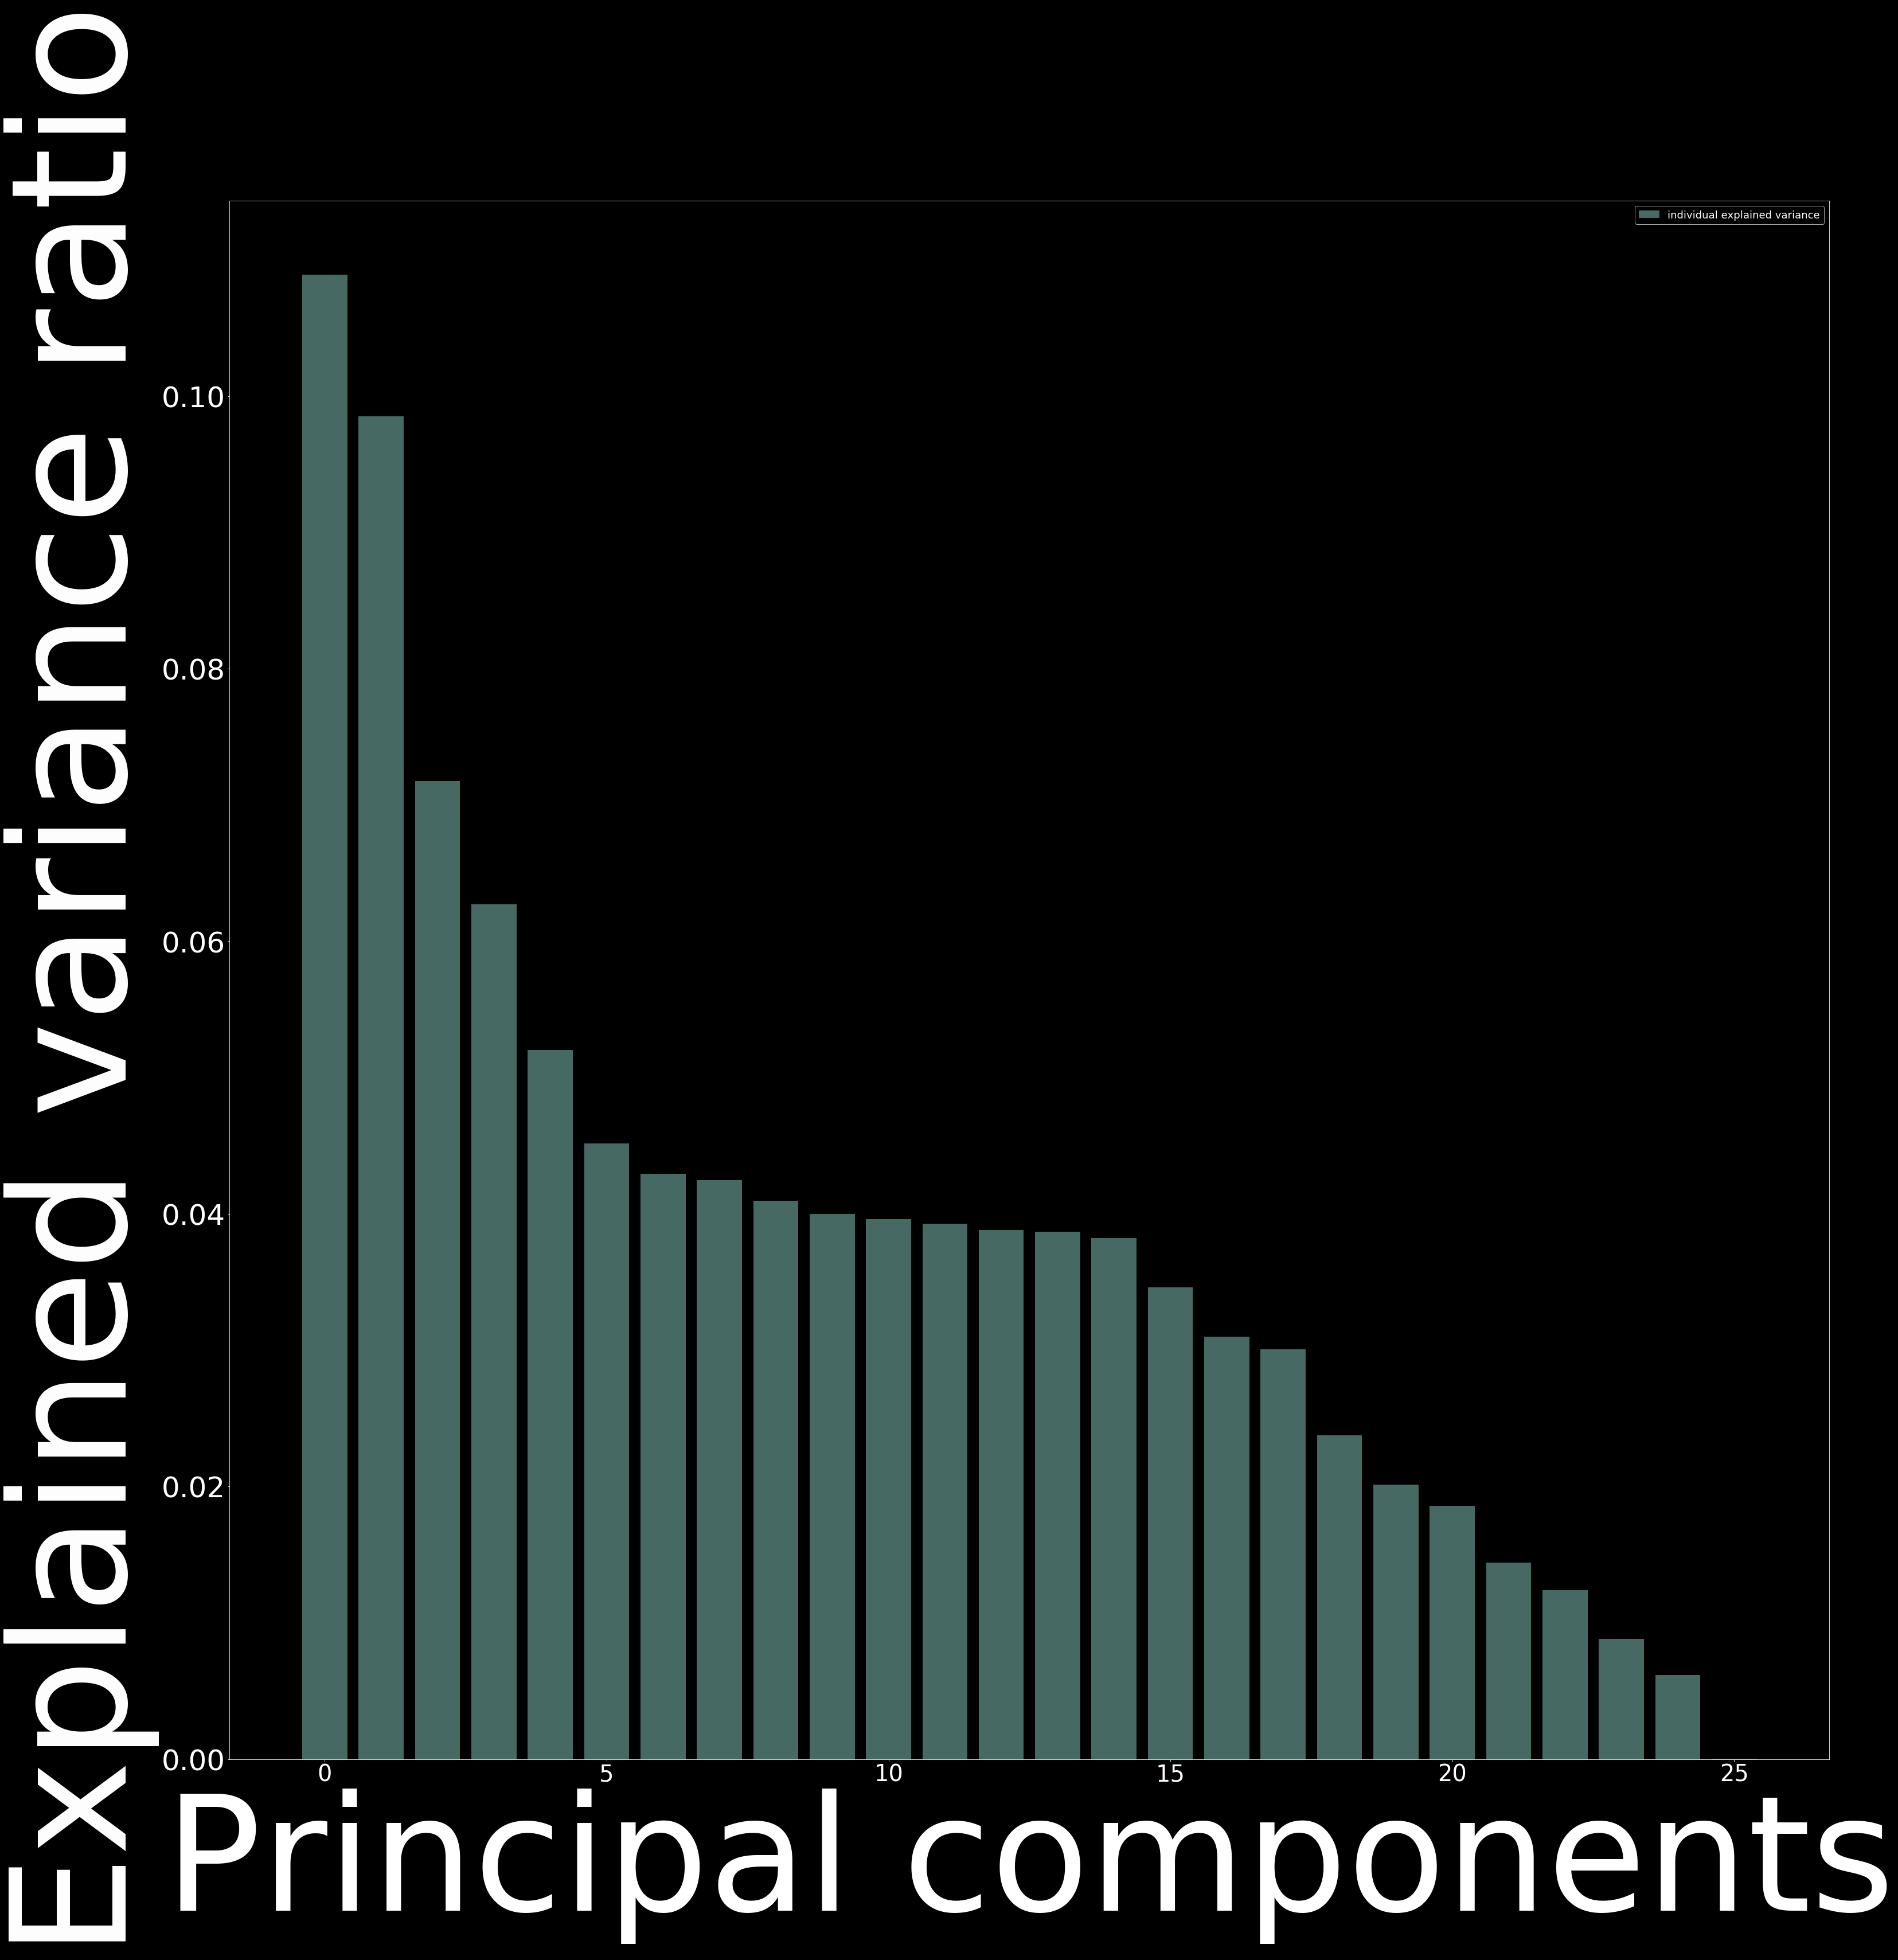

In [316]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(50, 50))

    plt.bar(range(26), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    #plt.tight_layout()

In [317]:
pca2 = PCA(n_components=6)
p_comp2 = pca2.fit_transform(scaled_X)
p_comp2

array([[ 1.06432715, -2.00529084,  0.90429402,  0.27577282, -0.25015221,
        -1.62423373],
       [-0.65631444, -1.84277832,  1.22178163,  1.01853962, -0.38627714,
        -1.96771442],
       [ 1.41038696, -2.26832833,  0.93492904,  0.96423938, -1.36548821,
         0.40943102],
       ...,
       [ 0.22839811,  3.07068729,  0.95277449, -2.8880307 , -1.16920326,
        -0.33917004],
       [-0.26654819,  2.9089133 ,  1.13594195, -3.03745889, -1.18963254,
        -0.33797488],
       [-0.19062211,  2.82150683,  1.16272288, -3.21303845, -1.16449639,
        -0.27875202]])

In [318]:
pca2.explained_variance_

array([2.83144668, 2.56157345, 1.86429082, 1.63032075, 1.3411701 ,
       1.16496533])

In [324]:
df_pca1 = pd.DataFrame(data= p_comp2, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])
df_pca1

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0       1.064327 -2.005291  0.904294  0.275773 -0.250152 -1.624234
1      -0.656314 -1.842778  1.221782  1.018540 -0.386277 -1.967714
2       1.410387 -2.268328  0.934929  0.964239 -1.365488  0.409431
3       2.831022 -1.478954  0.638936  1.997526 -1.192053  0.702840
4       1.822401 -2.445682  1.022469  0.577853 -1.267566  0.648046
...          ...       ...       ...       ...       ...       ...
472668  0.642910  3.298088  0.723720 -2.556705 -1.171984 -0.365845
472669  0.627034  3.238003  0.777827 -2.679965 -1.158394 -0.342352
472670  0.228398  3.070687  0.952774 -2.888031 -1.169203 -0.339170
472671 -0.266548  2.908913  1.135942 -3.037459 -1.189633 -0.337975
472672 -0.190622  2.821507  1.162723 -3.213038 -1.164496 -0.278752

[472673 rows x 6 columns]

In [333]:
pca_target = pca_target.reset_index(drop=True)
pca_target

Cover_Type
0                2
1                2
2                2
3                2
4                2
...            ...
472668           3
472669           3
472670           3
472671           3
472672           3

[472673 rows x 1 columns]

In [335]:
#df_pca1['Cover_Type'] = pca_target
#df_pca1 = df_pca1.drop(columns=['Cover_Type'])
df_pca1

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0       1.064327 -2.005291  0.904294  0.275773 -0.250152 -1.624234
1      -0.656314 -1.842778  1.221782  1.018540 -0.386277 -1.967714
2       1.410387 -2.268328  0.934929  0.964239 -1.365488  0.409431
3       2.831022 -1.478954  0.638936  1.997526 -1.192053  0.702840
4       1.822401 -2.445682  1.022469  0.577853 -1.267566  0.648046
...          ...       ...       ...       ...       ...       ...
472668  0.642910  3.298088  0.723720 -2.556705 -1.171984 -0.365845
472669  0.627034  3.238003  0.777827 -2.679965 -1.158394 -0.342352
472670  0.228398  3.070687  0.952774 -2.888031 -1.169203 -0.339170
472671 -0.266548  2.908913  1.135942 -3.037459 -1.189633 -0.337975
472672 -0.190622  2.821507  1.162723 -3.213038 -1.164496 -0.278752

[472673 rows x 6 columns]

In [306]:
X_PCA = df_pca1.drop(columns=['Cover_Type'])

In [301]:
Y_PCA = target
Y_PCA

11        2
21        2
27        2
35        2
61        2
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 472673, dtype: int64

In [336]:
ols_model = sm.OLS(pca_target,df_pca1)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2545.
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:14:49   Log-Likelihood:            -1.0754e+06
No. Observations:              472673   AIC:                         2.151e+06
Df Residuals:                  472667   BIC:                         2.151e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PCA1           0.0208      0.002     10.204      0.000       0.017       0.025
PCA2           0.2416      0.002    112.918      0.000       0.237       0.246
PCA3           0.1165      0.003     46.474      0.000       0.112       0.121
PCA4          -0.0014      0.003     -0.539      0.590      -0.007       0.004
PCA5           0.0103      0.003      3.497      0.000       0.005       0.016
PCA6           0.0495      0.003     15.595      0.000       0.043       0.056
==============================================================================
Omnibus:                   273236.115   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2023527.876
Skew:                           2.801   Prob(JB):                         0.00
Kurtosis:                      11.447   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(df_pca1, pca_target, test_size=0.4, random_state=42)

In [337]:
rf_pca = RandomForestClassifier(n_estimators=10)
rf_pca

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [339]:
rf_pca.fit(X_train_PCA, Y_train_PCA)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [340]:
Y_pred_PCA = rf_pca.predict(X_test_PCA)
print ("Random forest Accuracy Report : " ,classification_report(Y_test_PCA, Y_pred_PCA))

Random forest Accuracy Report :               precision    recall  f1-score   support

          1       0.86      0.88      0.87     73497
          2       0.88      0.89      0.88     93115
          3       0.83      0.85      0.84      8281
          4       0.75      0.38      0.50       322
          5       0.81      0.47      0.60      3064
          6       0.77      0.69      0.73      4661
          7       0.92      0.79      0.85      6130

avg / total       0.87      0.87      0.86    189070



MIT License

Copyright (c) 2020 Nikhil Kohli

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.